# 🧠 Análise de Segmentação de Clientes com Clusterização

Este notebook tem como objetivo explorar e segmentar a base de dados de clientes utilizando técnicas de **Clusterização** (K-Means), com foco em entender padrões de comportamento de compra e características sociodemográficas.

Através da análise exploratória, normalização de dados e aplicação do algoritmo K-Means, buscamos identificar grupos distintos de clientes que compartilham características semelhantes. Essa segmentação permite que a empresa adote **estratégias personalizadas** de marketing, retenção e relacionamento com base nos perfis encontrados.

## 📌 Etapas do Projeto

- **1. Carregamento e pré-processamento dos dados**  
  Separação dos dados em categorias como pessoas, produtos, local e promoção para melhor organização e limpeza.

- **2. Engenharia de atributos**  
  Criação de variáveis relevantes como `Children`, `TotalMnt`, `TotalPurchases`, entre outras.

- **3. Normalização e alocação de pesos**  
  Normalização com Min-Max e ponderação de variáveis com maior influência no perfil de valor dos clientes.

- **4. Clusterização com K-Means**  
  Aplicação do método do cotovelo para determinar o número ideal de clusters e agrupamento dos clientes.

- **5. Análise dos clusters**  
  Geração de gráficos comparativos, análises descritivas e identificação de perfis estratégicos.

- **6. Integração com Power BI(Próximo passo)**  
  Criação de um dashboard visual e interativo para facilitar a tomada de decisão baseada nos clusters identificados.

---

Este trabalho é fundamental para transformar dados brutos em **insights acionáveis**, possibilitando uma abordagem mais **inteligente e orientada por dados** nas estratégias comerciais e de marketing da organização.


## Importação das Bibliotecas

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pickle
import matplotlib.ticker as mtick



In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


## Leitura do Dataset

In [3]:
# Carregar o arquivo CSV para um DataFrame
df = pd.read_csv('marketing_campaign.csv', sep='\t')  # Verifique o separador ';'

# Exibir as primeiras linhas do DataFrame
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Análise Exploratória, Limpeza e Transformação

## 📊 Descrição das Variáveis do Dataset

| Variável                  | Tipo       | Descrição |
|---------------------------|------------|-----------|
| `ID`                      | Numérica   | Identificador único do cliente. |
| `Year_Birth`              | Numérica   | Ano de nascimento do cliente. |
| `Education`               | Categórica | Nível educacional do cliente (ex: Graduation, PhD, etc.). |
| `Marital_Status`          | Categórica | Estado civil do cliente. |
| `Income`                  | Numérica   | Renda anual do cliente. |
| `Kidhome`                 | Numérica   | Número de crianças na residência. |
| `Teenhome`                | Numérica   | Número de adolescentes na residência. |
| `Dt_Customer`             | Data       | Data de adesão do cliente. |
| `Recency`                 | Numérica   | Dias desde a última compra. |
| `MntWines`                | Numérica   | Gasto com vinhos nos últimos 2 anos. |
| `MntFruits`               | Numérica   | Gasto com frutas nos últimos 2 anos. |
| `MntMeatProducts`         | Numérica   | Gasto com carnes nos últimos 2 anos. |
| `MntFishProducts`         | Numérica   | Gasto com peixes nos últimos 2 anos. |
| `MntSweetProducts`        | Numérica   | Gasto com doces nos últimos 2 anos. |
| `MntGoldProds`            | Numérica   | Gasto com produtos de ouro nos últimos 2 anos. |
| `NumDealsPurchases`       | Numérica   | Número de compras com desconto realizadas. |
| `NumWebPurchases`         | Numérica   | Número de compras feitas através do website. |
| `NumCatalogPurchases`     | Numérica   | Número de compras realizadas por catálogo. |
| `NumStorePurchases`       | Numérica   | Número de compras realizadas em lojas físicas. |
| `NumWebVisitsMonth`       | Numérica   | Número de visitas ao site nos últimos 30 dias. |
| `AcceptedCmp1` a `AcceptedCmp5` | Binária    | Indicam se o cliente aceitou campanhas anteriores (1 = Sim, 0 = Não). |
| `Response`                | Binária    | Resposta à última campanha (1 = Sim, 0 = Não). |
| `Complain`                | Binária    | Indica se o cliente reclamou nos últimos 2 anos (1 = Sim, 0 = Não). |
| `Z_CostContact`           | Constante  | Variável técnica (valor fixo), pode ser descartada. |
| `Z_Revenue`               | Constante  | Variável técnica (valor fixo), pode ser descartada. |


In [4]:
def resumo_nulos(df):
    """
    Gera um resumo com:
    - Tipo da variável
    - Total de valores nulos
    - Percentual de valores nulos
    """
    total_linhas = len(df)
    resumo = pd.DataFrame({
        'Tipo': df.dtypes,
        'Nulos': df.isnull().sum(),
        '% Nulos': (df.isnull().sum() / total_linhas * 100).round(2)
    })
    
    # Ordena pelo percentual de nulos (opcional)
    resumo = resumo.reset_index().rename(columns={'index': 'Coluna'})
    resumo = resumo.sort_values(by='% Nulos', ascending=False).reset_index(drop=True)
    
    return resumo


In [5]:
def exibir_boxplot(
    df, 
    coluna, 
    orientacao='v', 
    mostrar_media=True, 
    anotar_outliers=False, 
    mostrar_estatisticas=False,
    cor='steelblue',
    tipo_dado='auto'  # 'auto', 'monetario' ou 'padrao'
):
    """
    Exibe um boxplot personalizado para uma coluna numérica.

    Parâmetros:
    - df: DataFrame
    - coluna: nome da coluna numérica
    - orientacao: 'v' (vertical) ou 'h' (horizontal)
    - mostrar_media: exibe linha da média
    - anotar_outliers: adiciona anotação para outliers
    - mostrar_estatisticas: exibe Q1, Q3, mediana como texto
    - cor: cor principal do gráfico (padrão: 'steelblue')
    - tipo_dado: 'auto', 'monetario', ou 'padrao' (define formatação dos eixos)
    """

    # Detecta tipo automaticamente se não informado
    if tipo_dado == 'auto':
        tipo_dado = 'monetario' if 'mnt' in coluna.lower() or 'income' in coluna.lower() else 'padrao'

    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    if orientacao == 'h':
        sns.boxplot(x=df[coluna], color=cor, width=0.4)
        plt.xlabel(coluna)
    else:
        sns.boxplot(y=df[coluna], color=cor, width=0.4)
        plt.ylabel(coluna)

    plt.title(f'📊 Distribuição da Coluna: {coluna}', fontsize=13, weight='bold')

    # Estatísticas
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    mediana = df[coluna].median()
    media = df[coluna].mean()

    # Formatação para exibição
    def formatar_valor(valor):
        return f"R$ {valor:,.0f}" if tipo_dado == 'monetario' else f"{valor:,.0f}"

    # Linha de média
    if mostrar_media:
        if orientacao == 'h':
            plt.axvline(media, color='red', linestyle='--', label=f'Média: {formatar_valor(media)}')
        else:
            plt.axhline(media, color='red', linestyle='--', label=f'Média: {formatar_valor(media)}')
        plt.legend()

    # Outliers
    if anotar_outliers:
        limite_sup = q3 + 1.5 * (q3 - q1)
        outliers = df[df[coluna] > limite_sup]
        for val in outliers[coluna]:
            if orientacao == 'h':
                plt.annotate(formatar_valor(val), xy=(val, 0), xytext=(5, 10), textcoords='offset points', fontsize=8)
            else:
                plt.annotate(formatar_valor(val), xy=(0, val), xytext=(5, 5), textcoords='offset points', fontsize=8)

    # Estatísticas extras
    if mostrar_estatisticas:
        estat = (
            f"Q1: {formatar_valor(q1)}\n"
            f"Mediana: {formatar_valor(mediana)}\n"
            f"Q3: {formatar_valor(q3)}"
        )
        if orientacao == 'h':
            plt.annotate(
                estat,
                xy=(df[coluna].quantile(0.75), 0), 
                xytext=(20, 20),
                textcoords='offset points',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7)
            )
        else:
            plt.annotate(
                estat,
                xy=(0, df[coluna].quantile(0.75)), 
                xytext=(10, 20),
                textcoords='offset points',
                fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7)
            )


In [6]:
def grafico_barras_com_valores(df, coluna_categorica, coluna_valor, aggfunc='sum'):
    """
    Exibe um gráfico de barras com os valores agregados e mostra o valor acima de cada barra.
    
    Parâmetros:
    - df: DataFrame
    - coluna_categorica: coluna com categorias (ex: 'Marital_Status')
    - coluna_valor: coluna com valores numéricos (ex: 'Income')
    - aggfunc: tipo de agregação ('sum', 'mean', etc.)
    """
    agrupado = df.groupby(coluna_categorica)[coluna_valor].agg(aggfunc).sort_values()
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=agrupado.index, y=agrupado.values)
    plt.title(f'{aggfunc.capitalize()} de {coluna_valor} por Cliente')
    plt.ylabel(f'Quantidade de Clientes')
    plt.xticks(rotation=45)
    
    # Adiciona o valor acima de cada barra
    for p in ax.patches:
        altura = p.get_height()
        ax.annotate(f'{altura:.0f}', (p.get_x() + p.get_width() / 2, altura),
                    ha='center', va='bottom', fontsize=10)
    
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


## 📂Separar o DataFrame em subconjuntos?

Durante a análise exploratória e preparação dos dados, optamos por dividir o DataFrame original em 4 partes:

- `df_people`: dados demográficos (idade, estado civil, escolaridade, renda, etc.)
- `df_products`: consumo por categoria (vinhos, carnes, doces, etc.)
- `df_promotion`: comportamento promocional (compras com desconto, reclamações, etc.)
- `df_place`: canais de compra (loja física, web, catálogo, etc.)

---

### ✅ Vantagens da separação

#### 1. **Organização semântica**
- Cada subconjunto representa um eixo comportamental distinto.
- Isso facilita **foco em análises específicas** (ex: perfil demográfico x consumo de produto).

#### 2. **Modularidade nas transformações**
- Permite aplicar tratamentos, normalizações e atribuições de peso **de forma independente**.
- Exemplo: aplicar `MinMaxScaler` apenas em `df_products` sem afetar variáveis categóricas de `df_people`.

#### 3. **Facilidade em análises segmentadas**
- Torna mais intuitivo fazer análises do tipo:
  - "Qual cluster consome mais doces?" → `df_products`
  - "Qual cluster tem maior renda?" → `df_people`
  - "Quem responde melhor a promoções?" → `df_promotion`

#### 4. **Engenharia de Features mais limpa**
- Evita criar features cruzadas entre variáveis com significados completamente diferentes.
- Permite fazer concatenações com mais controle no final do pipeline.

#### 5. **Reusabilidade**
- Podemos usar `df_products` isoladamente em um modelo de recomendação, por exemplo.
- Ou `df_people` em uma modelagem de churn baseada apenas em perfil.

---

### 🧠 Conclusão

A separação dos dados em partes temáticas melhora a **legibilidade**, **manutenção**, **controle de qualidade** e a **eficiência das transformações**, sendo uma prática comum em pipelines robustos de **Data Science e Engenharia de Dados**.


## 1. People — características demográficas e pessoais

In [7]:
df_people = df[[
    'ID', 'Year_Birth', 'Education', 'Marital_Status',
    'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain'
]]


In [8]:
resumo_nulos(df_people)

,Coluna,Tipo,Nulos,% Nulos
0,Income,float64,24,1.07
1,ID,int64,0,0.00
2,Year_Birth,int64,0,0.00
3,Education,object,0,0.00
4,Marital_Status,object,0,0.00
5,Kidhome,int64,0,0.00
6,Teenhome,int64,0,0.00
7,Dt_Customer,object,0,0.00
8,Recency,int64,0,0.00
9,Complain,int64,0,0.00


#### Excluindo nulos do `Income`

### Income

In [9]:
df_people = df_people.copy()
df_people.dropna(inplace=True)



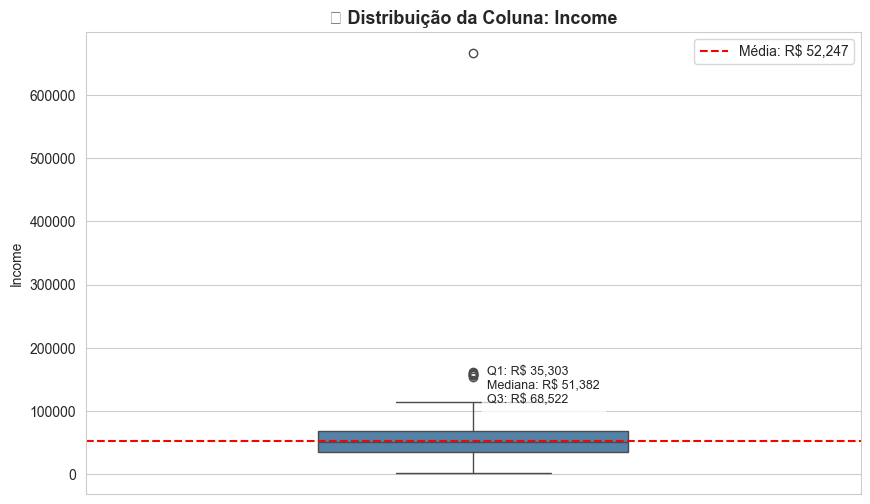

In [10]:
exibir_boxplot(df_people, 'Income', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)


#### 📊 Análise da Distribuição de Renda (`Income`) – *Com Outliers Visíveis*

O gráfico boxplot acima representa a distribuição da variável **Income** antes da remoção dos outliers. Essa visualização é essencial para identificar possíveis distorções causadas por valores extremos.

#### 🔍 Principais Observações:

- A presença de **outliers extremos** (acima de R$ 600.000) é clara e pode impactar significativamente análises estatísticas e modelos de Machine Learning.
- A **mediana e a média estão próximas**, indicando uma distribuição relativamente simétrica com leve cauda à direita.
- A maioria dos clientes está concentrada na faixa entre **`R$ 35.000` e `R$ 68.000**` de renda anual.

#### 🧠 Implicações Analíticas:

- Recomenda-se **tratar os outliers** (remoção ou transformação) antes de aplicar modelos sensíveis a distâncias, como o **K-Means**.
- Em contextos comerciais, esses outliers podem representar **clientes de alto poder aquisitivo** ou **casos atípicos** que merecem análise segmentada.


#### Excluindo valores do `Income` maiores que 200000

In [11]:
df_people = df_people[df_people.Income < 200000]

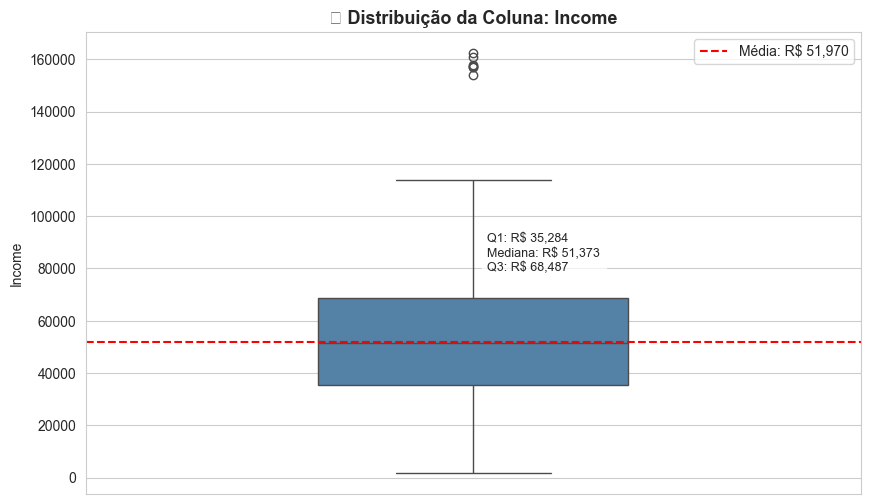

In [12]:
exibir_boxplot(df_people, 'Income', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

### Year_birth

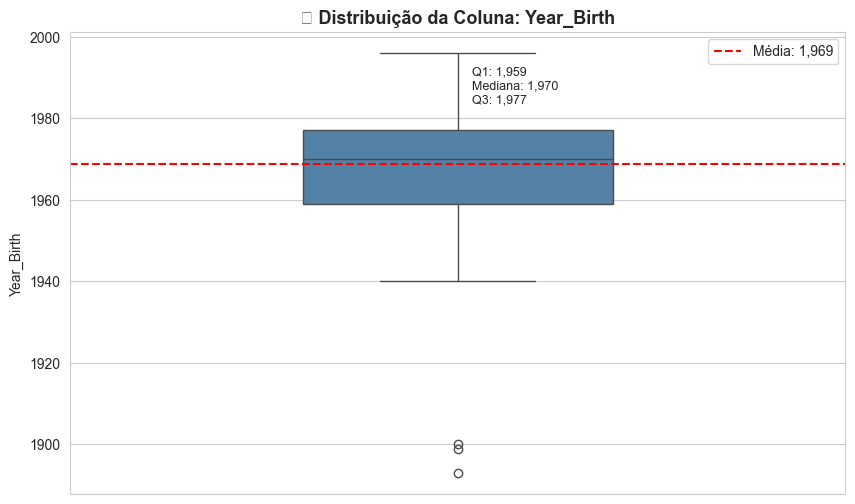

In [13]:
exibir_boxplot(df_people, 'Year_Birth', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)


#### Removendo os 3 que estão em 1900

In [14]:
df_people = df_people[df_people.Year_Birth > 1930]

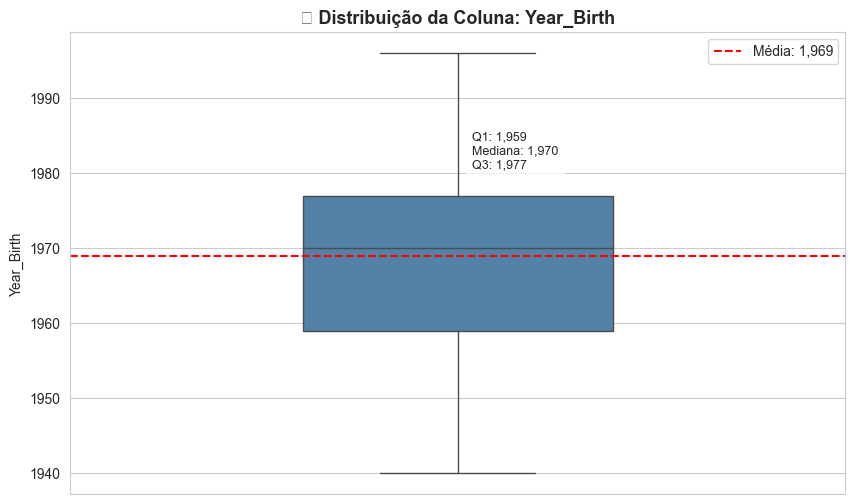

In [15]:
exibir_boxplot(df_people, 'Year_Birth', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

### Education

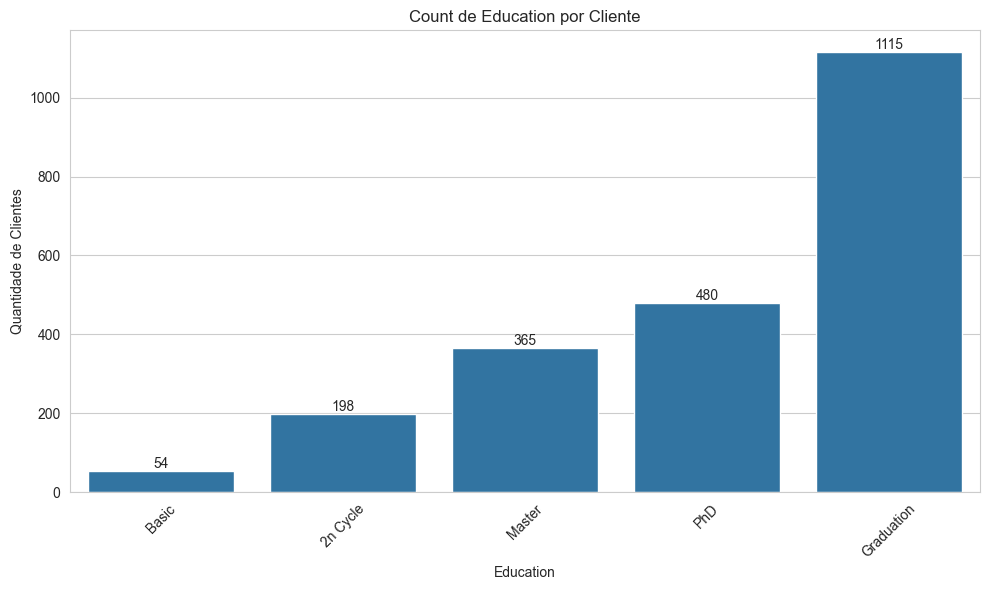

In [16]:
grafico_barras_com_valores(df_people, 'Education', 'Education', aggfunc='count')

### 🎓 Codificação Ordinal da Variável Education

A variável `Education` representa o nível educacional dos clientes com **valores categóricos que possuem uma ordem lógica** (ex: `Basic < 2n Cycle < Graduation < Master < PhD`).

### 📊 Distribuição Inicial
A distribuição de clientes por escolaridade é a seguinte:

- Basic: 54 clientes
- 2n Cycle: 198 clientes
- Master: 365 clientes
- PhD: 480 clientes
- Graduation: 1115 clientes

### 🧠 Por que usar **Ordinal Encoding**?
A abordagem de **ordinal encoding** é apropriada quando as categorias possuem um **grau de progressão hierárquica**. Diferente de uma codificação one-hot, essa técnica **preserva a relação de ordem** entre os níveis, sendo útil para algoritmos que interpretam os valores numericamente (ex: regressão, K-Means).

### ✅ Mapeamento utilizado:

| Categoria     | Valor Codificado |
|---------------|------------------|
| Basic         | 0                |
| 2n Cycle      | 1                |
| Graduation    | 2                |
| Master        | 3                |
| PhD           | 4                |


## Ordinal encoding

Essa abordagem é chamada de ordinal encoding, porque a escolaridade tem uma ordem lógica.

In [17]:
df_people.Education = df_people.Education.apply(lambda x: 
        0 if x == 'Basic' else
        1 if x == '2n Cycle' else
        2 if x == 'Graduation' else
        3 if x == 'Master' else
        4 if x == 'PhD' else
        None  # trata casos inesperados
    )


### Marital_Status

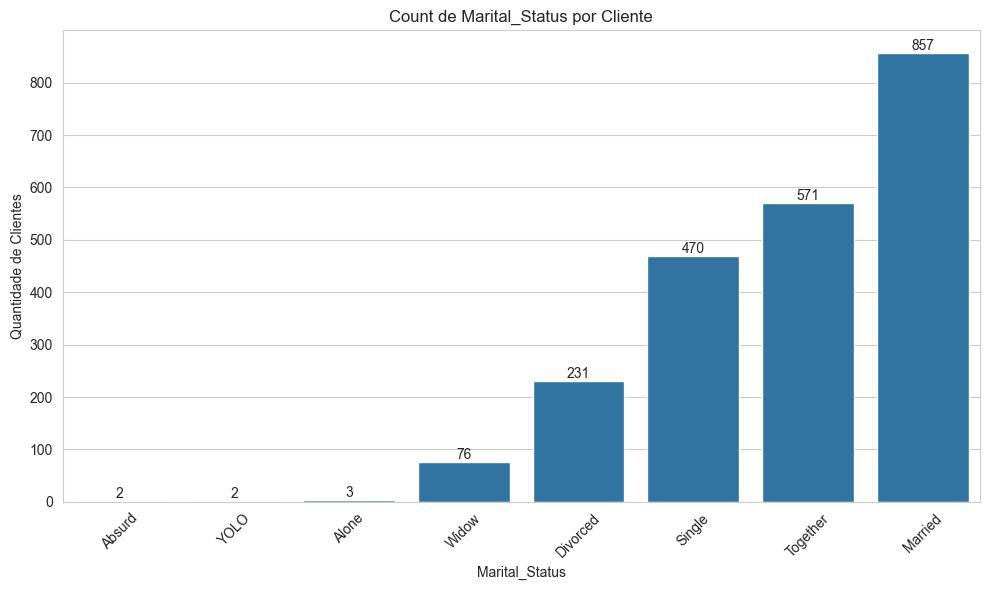

In [18]:
grafico_barras_com_valores(df_people, 'Marital_Status', 'Marital_Status', aggfunc='count')

### Observações:
Categorias como "Absurd", "YOLO" e "Alone" aparecem com pouquíssimas observações (< 5). Isso indica que são:

Provavelmente categorias inválidas ou erros de entrada.

Ruído que pode atrapalhar o modelo de segmentação.

In [19]:
categorias_invalidas = ['YOLO', 'Absurd', 'Alone']
    
df_people['Marital_Status'] = df_people['Marital_Status'].apply(
        lambda x: 'Single' if x in categorias_invalidas else x
    )

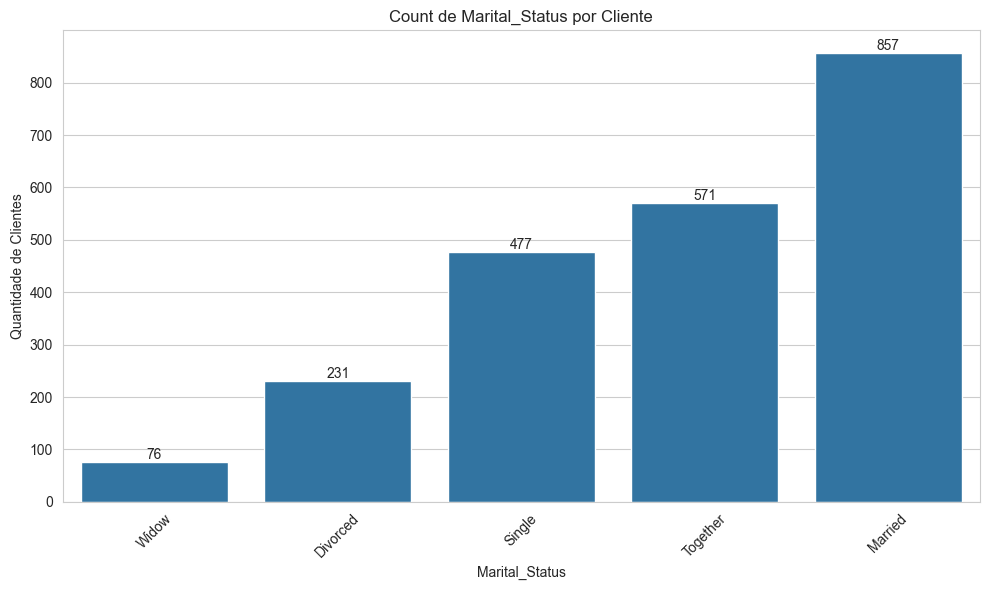

In [20]:
grafico_barras_com_valores(df_people, 'Marital_Status', 'Marital_Status', aggfunc='count')

#### Codificação One-Hot (One-Hot Encoding)
Cria uma nova coluna binária para cada categoria.

✔️ Quando usar:
 - Para modelos que não assumem relações lineares entre categorias (como K-Means).

 - Ideal para segmentação e modelos baseados em distância.

In [21]:
df_people.dtypes

ID                  int64
Year_Birth          int64
Education           int64
Marital_Status     object
Income            float64
Kidhome             int64
Teenhome            int64
Dt_Customer        object
Recency             int64
Complain            int64
dtype: object

##### Codificação One-Hot (One-Hot Encoding)

In [22]:
df_people = pd.get_dummies(df_people, columns=['Marital_Status'])

In [23]:
df_people.head()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,2,58138.0,0,0,04-09-2012,58,0,False,False,True,False,False
1,2174,1954,2,46344.0,1,1,08-03-2014,38,0,False,False,True,False,False
2,4141,1965,2,71613.0,0,0,21-08-2013,26,0,False,False,False,True,False
3,6182,1984,2,26646.0,1,0,10-02-2014,26,0,False,False,False,True,False
4,5324,1981,4,58293.0,1,0,19-01-2014,94,0,False,True,False,False,False


In [24]:
# Converte colunas booleanas (True/False) para inteiras (1/0)
for col in df_people.select_dtypes(include='bool').columns:
    df_people[col] = df_people[col].astype(int)


#### KidHome

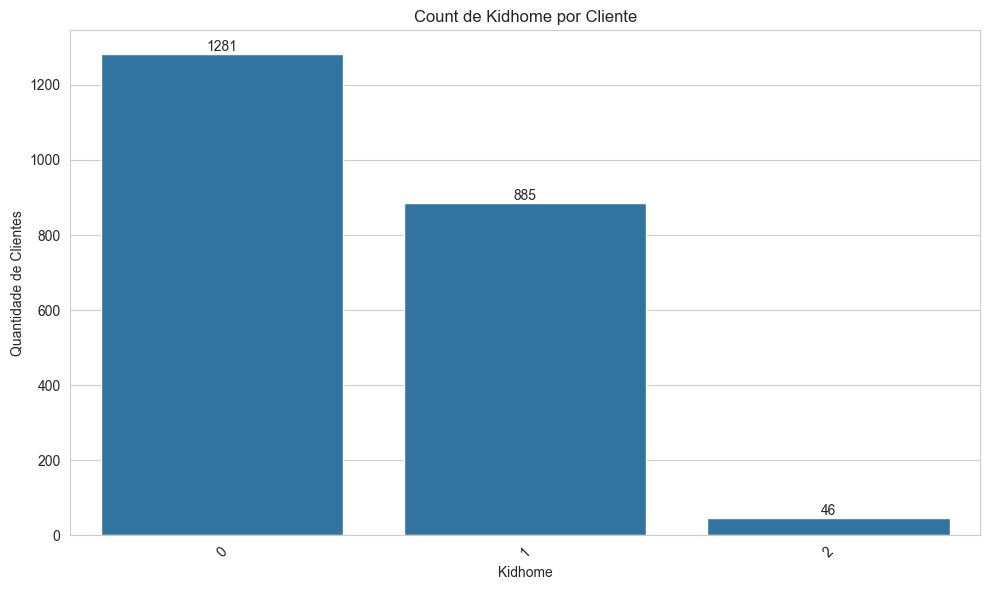

In [25]:
grafico_barras_com_valores(df_people, 'Kidhome', 'Kidhome', aggfunc='count')

#### TennHome

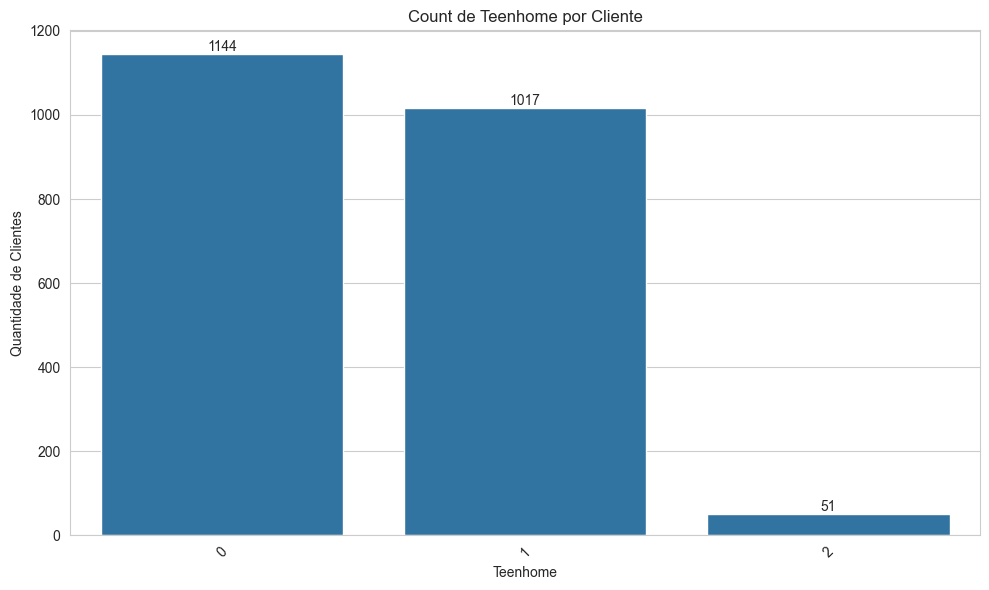

In [26]:
grafico_barras_com_valores(df_people, 'Teenhome', 'Teenhome', aggfunc='count')

### Como modelar essas variáveis?
#### Opção mais direta e útil: somar ambas para criar uma variável Children

- É interpretável: **total de dependentes jovens no lar**.

- Reduz dimensionalidade sem perda de informação.

#### 🧩 Importância da Criação da Coluna `Children`

A coluna `Children` foi criada a partir da soma de `KidHome` (crianças) e `TeenHome` (adolescentes), com o objetivo de representar o **número total de dependentes em casa**.

---

#### ✅ Por que isso é importante?

- **Consolidação de Informação**: Ao unir essas duas variáveis, temos uma métrica única e mais direta para análise demográfica.
- **Facilita segmentações**: Permite agrupar clientes com base no número total de filhos, o que é útil para estratégias de marketing familiar.
- **Reduz complexidade**: Simplifica modelos preditivos e análises exploratórias ao evitar múltiplas variáveis com significados semelhantes.
- **Melhor entendimento de perfis**: Compreender quantos filhos vivem com o cliente pode indicar **nível de responsabilidade financeira**, **estágio de vida** e **comportamentos de consumo**.

---

> 📌 **Exemplo prático**:  
Um cliente com `Children = 1` pode responder melhor a campanhas de produtos infantis ou serviços escolares do que outro sem dependentes.


In [27]:
df_people['Children'] = df_people['Kidhome'] + df_people['Teenhome']

In [28]:
# Remover colunas originais, se não forem mais necessárias
df_people.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

### Children

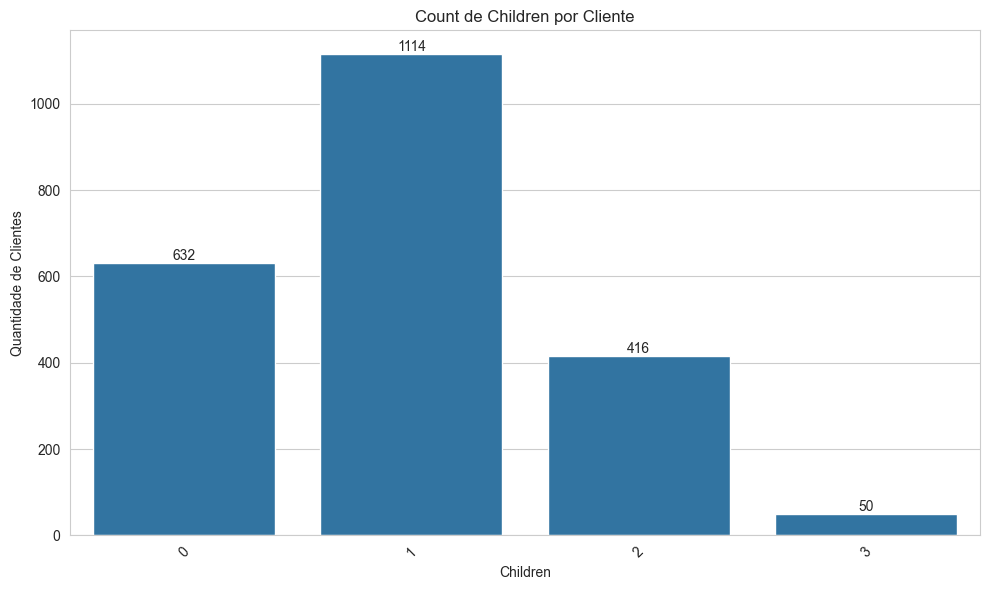

In [29]:
grafico_barras_com_valores(df_people, 'Children', 'Children', aggfunc='count')

#### Dt_Customer

##### Temos que transformar a colunas `Dt_Costumer`

In [30]:
df_people['Dt_Customer'] = pd.to_datetime(df_people['Dt_Customer'], dayfirst=True)

In [31]:
df_people.Dt_Customer.min()

Timestamp('2012-07-30 00:00:00')

In [32]:
df_people.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

#### Criar a coluna de tempo do cliente

In [33]:
# Calcular antiguidade do cliente em dias
df_people['Customer_Age_Days'] = (pd.Timestamp('2014-06-29') - df_people['Dt_Customer']).dt.days


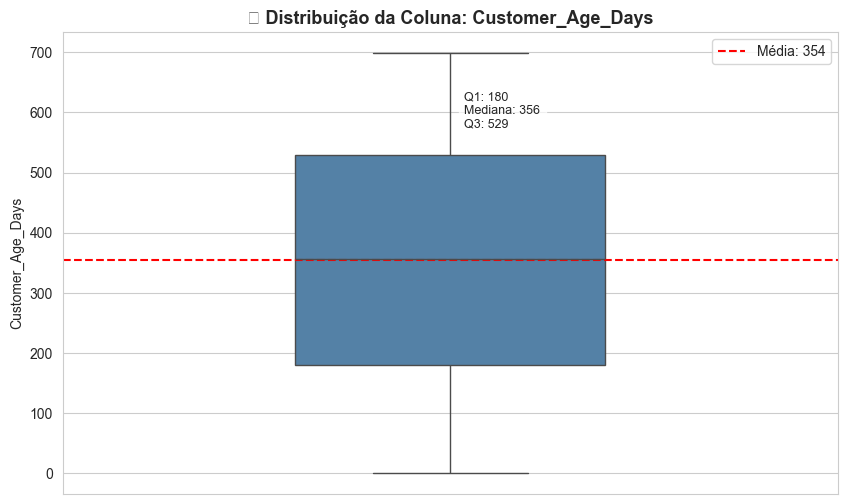

In [34]:
exibir_boxplot(df_people, 'Customer_Age_Days', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

#### 🔍 Interpretação:

- A distribuição apresenta **simetria**, com a média e a mediana próximas.
- A maior concentração dos dados (50%) está entre **180 e 529 dias** de relacionamento com a empresa.
- Clientes com menos de 180 dias representam o grupo mais novo na base, enquanto aqueles com mais de 529 dias estão entre os mais antigos.
- Não foram considerados outliers nesta visualização, o que foca na faixa mais representativa.

---

#### ✅ Importância Analítica:

- Clientes mais antigos tendem a demonstrar **maior lealdade** e podem ter **comportamentos de compra diferentes** dos novos.
- Pode ser interessante cruzar essa variável com métricas como **recência de compra**, **total gasto** ou **engajamento promocional**.
- Estratégias de retenção, fidelização ou reativação podem ser ajustadas com base no tempo de relacionamento do cliente.

> 📌 **Conclusão**: `Customer_Age_Days` é essencial para análises de ciclo de vida do cliente e personalização de campanhas com base no tempo de vínculo com a empresa.

In [35]:
# Remover a coluna original (opcional)
df_people.drop('Dt_Customer', axis=1, inplace=True)

#### Recency

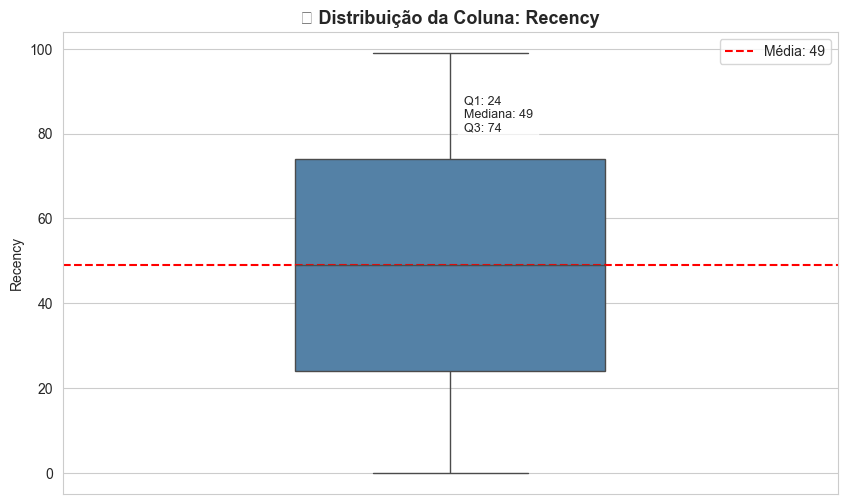

In [36]:
exibir_boxplot(df_people, 'Recency', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

### ⏳ Análise da Variável `Recency`

A variável `Recency` representa o número de **dias desde a última compra** realizada pelo cliente. É uma métrica fundamental em análises RFM (Recência, Frequência e Valor Monetário), muito utilizada em estratégias de marketing.

---

#### 🔍 Interpretação:

- A distribuição é **simétrica**, com média e mediana iguais, indicando equilíbrio entre os clientes que compraram recentemente e os que estão há mais tempo sem comprar.
- 50% dos clientes realizaram a última compra entre **24 e 74 dias atrás**.
- Clientes com `Recency` baixo (próximo de 0) são os **mais recentes** e, portanto, **mais engajados**.
- Já clientes com `Recency` alto (acima de 100 dias) podem estar em risco de **desengajamento** ou abandono.

---

#### ✅ Relevância Estratégica:

- Permite **segmentar campanhas** com base na proximidade da última compra:
  - **Alta recência** → Ações de reativação.
  - **Baixa recência** → Fidelização e upsell.
- Pode ser combinada com **TotalMnt** e **TotalPurchases** para construir **perfis de valor e engajamento**.

> 📌 **Conclusão**: `Recency` é uma variável-chave para ações direcionadas e estratégias de retenção. Clientes que compraram há menos tempo têm maior chance de conversão em campanhas imediatas.


### Complain

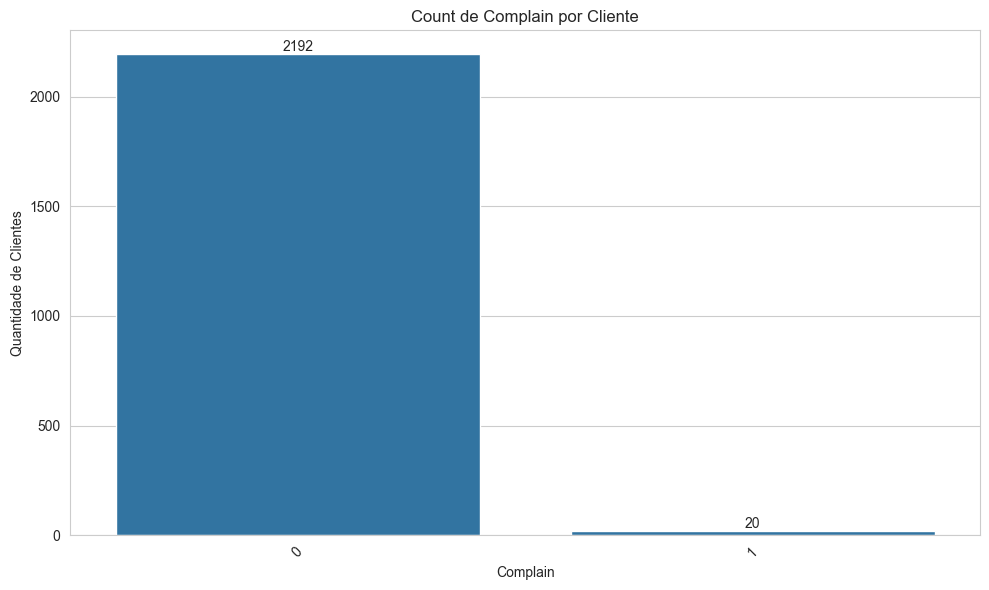

In [37]:
grafico_barras_com_valores(df_people, 'Complain', 'Complain', aggfunc='count')

### 📉 Análise da Variável `Complain`

O gráfico de contagem para a variável `Complain` mostra uma **alta desproporção de classes**:

- **2192 clientes** não reclamaram (`Complain = 0`)
- Apenas **20 clientes** registraram reclamações (`Complain = 1`)

---

#### ⚠️ O que isso indica?

- `Complain` é uma variável **binária altamente desbalanceada**
- Apenas **~0,9% dos clientes** reclamaram
- Isso pode limitar o impacto dessa variável em algoritmos de clustering, especialmente os baseados em distância, como **K-Means**, que **não lidam bem com variáveis raras**

---

#### ✅ Recomendação prática:

- **Não utilizar `Complain` diretamente** no modelo de clustering
- Realizar o **agrupamento sem essa variável**
- Após o clustering, **analisar a distribuição de `Complain` dentro de cada grupo** para entender se há clusters com maior concentração de reclamações

> 📌 **Conclusão**: `Complain` pode ser mais útil como uma **variável explicativa pós-clustering** do que como uma variável preditiva no agrupamento.


In [38]:
# Remover a coluna complain
df_people.drop('Complain', axis=1, inplace=True)

In [39]:
df_people.head()

,ID,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Children,Customer_Age_Days
0,5524,1957,2,58138.0,58,0,0,1,0,0,0,663
1,2174,1954,2,46344.0,38,0,0,1,0,0,2,113
2,4141,1965,2,71613.0,26,0,0,0,1,0,0,312
3,6182,1984,2,26646.0,26,0,0,0,1,0,1,139
4,5324,1981,4,58293.0,94,0,1,0,0,0,1,161


## 2. Products — comportamento de compra por tipo de produto

In [40]:
df_products = df[[
    'ID','MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]]


In [41]:
resumo_nulos(df_products)

,Coluna,Tipo,Nulos,% Nulos
0,ID,int64,0,0.0
1,MntWines,int64,0,0.0
2,MntFruits,int64,0,0.0
3,MntMeatProducts,int64,0,0.0
4,MntFishProducts,int64,0,0.0
5,MntSweetProducts,int64,0,0.0
6,MntGoldProds,int64,0,0.0


In [42]:
df_products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


#### MntWines

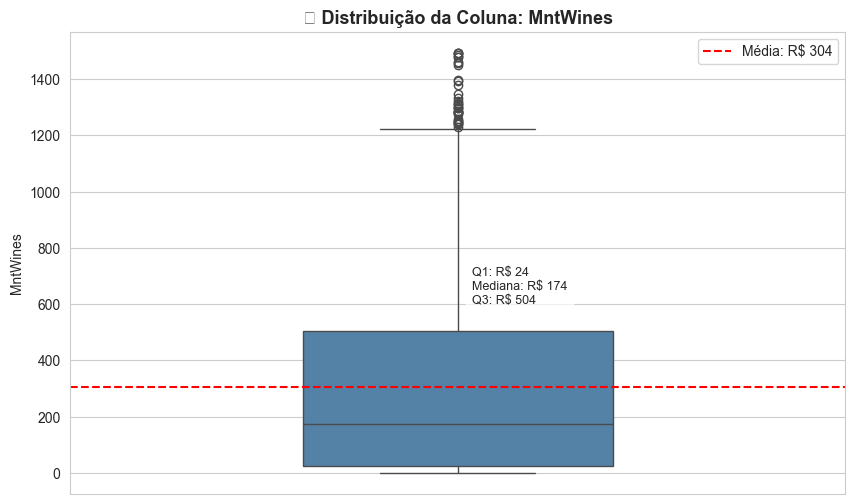

In [43]:
exibir_boxplot(df_products, 'MntWines', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

#### 🔎 Observações:

- A distribuição é **assimétrica à direita**, indicando a presença de clientes com **gastos muito elevados com vinhos**.
- A **média é significativamente maior que a mediana**, reforçando a presença de **outliers positivos** (clientes que gastam muito acima da média).
- Muitos pontos além do Q3 estão presentes, representando **clientes com alto potencial de valor** para estratégias de marketing ou fidelização.

---

#### ✅ Insights Práticos:

- Clientes que gastam muito com vinhos podem ser considerados um **segmento premium** e merecem ações específicas (ex: ofertas exclusivas).
- Como os outliers representam um comportamento real (não erro), eles **não devem ser removidos**, mas sim analisados separadamente.

#### MntMeatProducts

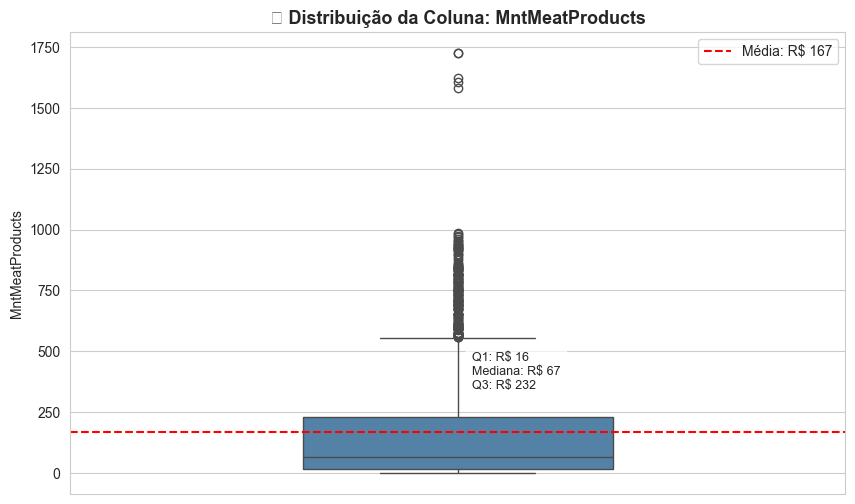

In [44]:
exibir_boxplot(df_products, 'MntMeatProducts', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

#### 🔎 Observações:

- A distribuição é **fortemente assimétrica à direita**, com muitos **outliers acima do Q3**, indicando a existência de clientes com alto consumo de carnes.
- A **média (`R$ 167`)** está bem acima da **mediana (R$ 67)**, reforçando a presença de **clientes com gastos muito elevados** nesse segmento.
- A maior parte dos clientes gasta **menos de `R$ 250`**, mas há um grupo específico que ultrapassa os **`R$ 1.000`**.

---

#### ✅ Insights Práticos:

- Clientes com alto gasto em carnes podem representar um **perfil mais tradicional** ou com preferência por **produtos perecíveis de valor agregado**.
- Esses clientes são bons candidatos para **ações promocionais em carnes premium** ou programas de fidelidade relacionados a esse tipo de produto.

#### MntFishProducts

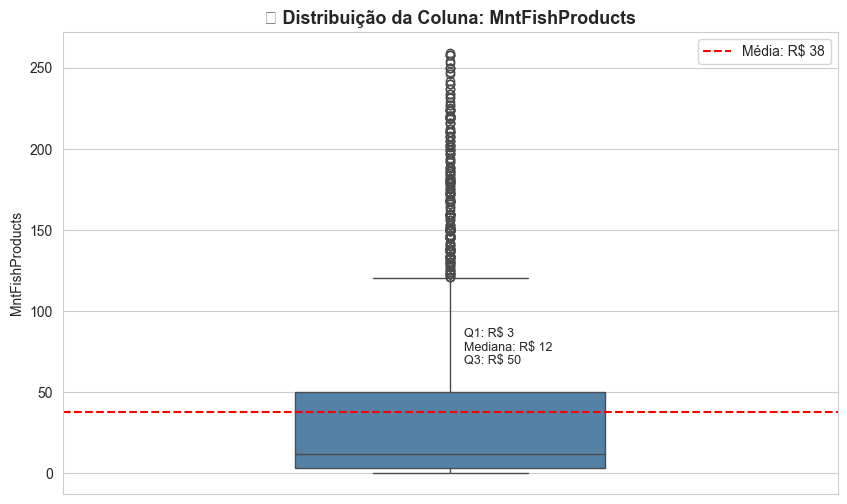

In [45]:
exibir_boxplot(df_products, 'MntFishProducts', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

#### 🔎 Observações:

- A distribuição é **fortemente assimétrica à direita**, com muitos **outliers acima do Q3**, o que indica um **grupo restrito de clientes** com alto consumo de peixes.
- A **mediana muito baixa (`R$ 12`)** mostra que a **maior parte dos clientes consome pouco ou nada** desta categoria.
- Há uma grande quantidade de clientes com gastos entre `R$ 0` e `R$ 50`.

---

#### ✅ Insights Práticos:

- Produtos de peixe parecem ter **baixa penetração** entre os clientes.
- Pode ser interessante criar **campanhas promocionais** ou de **educação nutricional** para aumentar o consumo desta categoria.

#### MntSweetProducts

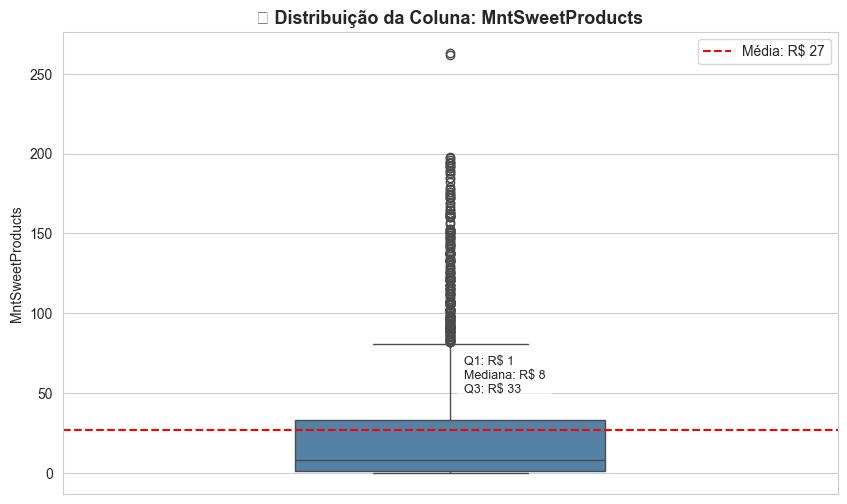

In [46]:
exibir_boxplot(df_products, 'MntSweetProducts', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

#### 🔎 Observações:

- A distribuição apresenta forte **assimetria à direita**, com vários **outliers** indicando alguns clientes com gastos expressivos.
- A **mediana baixa** revela que a maior parte dos clientes **quase não consome doces**, apesar de existirem casos com consumo elevado.
- Há um desvio notável entre a média e a mediana, reforçando a presença de valores extremos.

---

#### ✅ Insights Práticos:

- Os doces possuem **consumo restrito a um grupo específico** de clientes.
- Estratégias como **combos promocionais** ou **vendas cruzadas** (ex: junto a vinhos ou carnes) podem impulsionar essa categoria.
- Clientes que já demonstram apetite por doces podem ser incluídos em **campanhas sazonais**, como Páscoa e Natal, para aumentar o ticket médio.


#### MntGoldProds

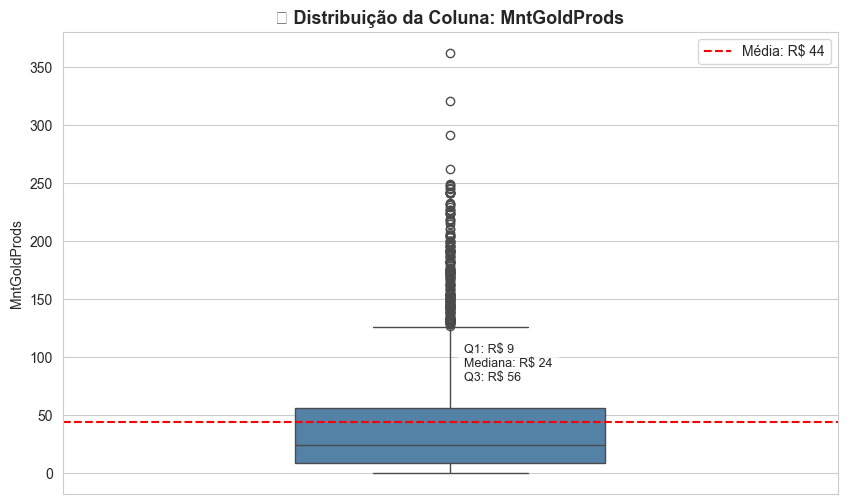

In [47]:
exibir_boxplot(df_products, 'MntGoldProds', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

#### 🔎 Observações:

- A distribuição apresenta **assimetria à direita**, com diversos **outliers**, indicando que embora a maioria dos clientes tenha gastos moderados, há um grupo que consome significativamente mais.
- A **diferença entre média e mediana** revela a influência de clientes com alto gasto nessa categoria.

---

#### ✅ Insights Práticos:

- Produtos "gold" são consumidos de forma **pontual e concentrada**.
- Podem ser posicionados como **itens premium ou exclusivos**, com foco em **clientes de maior poder aquisitivo**.
- Estratégias de **upsell** ou **benefícios por fidelidade** (ex: brindes, frete grátis) podem incentivar o aumento da adesão a essa categoria.

#### Criando uma coluna de Gasto total

In [48]:
df_products['TotalMnt'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)


C:\Users\luizf\AppData\Local\Temp\ipykernel_23012\4064694059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products['TotalMnt'] = (


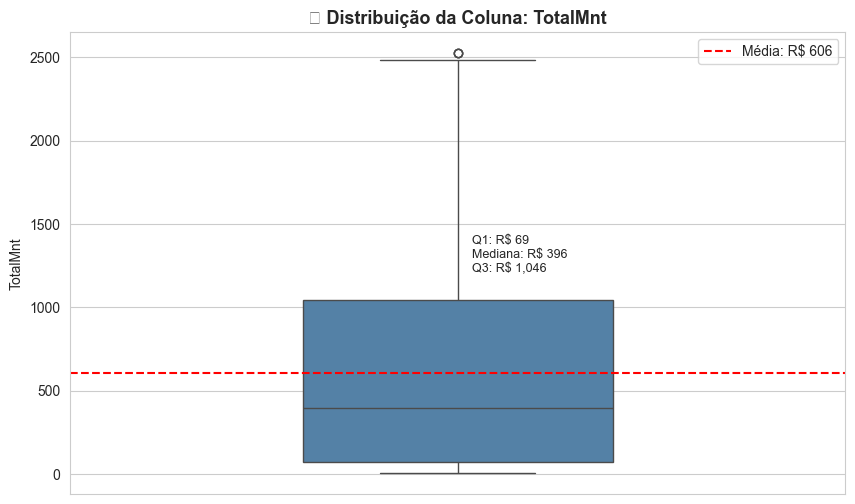

In [49]:
exibir_boxplot(df_products, 'TotalMnt', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

### 💡 Estratégia por trás da criação da coluna `TotalMnt`

A coluna `TotalMnt` foi criada como a **soma total dos gastos** de cada cliente em todas as categorias de produto disponíveis (vinhos, carnes, peixes, frutas, doces, produtos de ouro etc.).

#### 🎯 Objetivo

Concentrar o **comportamento de consumo total** do cliente em uma única variável quantitativa, facilitando análises agregadas e estratégias de segmentação.

#### 📈 Vantagens

- **Visão holística do cliente**: Em vez de analisar cada tipo de produto separadamente, `TotalMnt` resume o **nível de engajamento financeiro** do cliente com a empresa.
- **Facilita o clustering**: Essa variável é extremamente útil para identificar **clientes de alto valor (High-Value Customers)**.
- **Priorização de campanhas**: Permite direcionar ações de marketing mais agressivas para clientes com maior potencial de retorno.

#### 📊 Interpretação do boxplot

- A **mediana** está em **`R$ 396`**, enquanto a **média** é maior (**`R$ 606`**), indicando uma **distribuição assimétrica à direita**.
- Existem **clientes outliers** com gastos muito acima da média, que podem representar **clientes VIP** ou que merecem um tratamento diferenciado.

#### ✅ Conclusão

`TotalMnt` é uma variável sintética poderosa para análises de segmentação, clusterização e estratégias de fidelização, pois sintetiza o poder de compra e o engajamento do cliente com a marca.


In [50]:
# Lista de colunas de gasto
colunas_gasto = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Para cada coluna, criar a nova coluna com o percentual
for col in colunas_gasto:
    df_products[f'{col}_Pct'] = df_products[col] / df_products['TotalMnt']


C:\Users\luizf\AppData\Local\Temp\ipykernel_23012\1463653648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products[f'{col}_Pct'] = df_products[col] / df_products['TotalMnt']
C:\Users\luizf\AppData\Local\Temp\ipykernel_23012\1463653648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products[f'{col}_Pct'] = df_products[col] / df_products['TotalMnt']
C:\Users\luizf\AppData\Local\Temp\ipykernel_23012\1463653648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [51]:
df_products.describe()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalMnt,MntWines_Pct,MntFruits_Pct,MntMeatProducts_Pct,MntFishProducts_Pct,MntSweetProducts_Pct,MntGoldProds_Pct
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,605.798214,0.458481,0.049505,0.249508,0.071532,0.050777,0.120196
std,3246.662198,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,602.249288,0.228411,0.055867,0.126633,0.077909,0.061184,0.108988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,68.750000,0.289506,0.008924,0.156250,0.012571,0.008621,0.038095
50%,5458.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000,0.457482,0.029840,0.233447,0.048193,0.033333,0.086294
75%,8427.750000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,1045.500000,0.639143,0.070237,0.328227,0.104703,0.070411,0.169768
max,11191.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150


### ✅ Cálculo dos Percentuais de Gasto (`*_Pct`)
Ao dividir cada tipo de gasto pelo total (`TotalMnt`), obtemos a **composição percentual** dos gastos do cliente.

Essa transformação é importante porque:

- 📊 **Normaliza o comportamento de compra**: clientes com diferentes níveis de gasto podem ter perfis semelhantes (ex: ambos gastam 80% em vinhos).
- 🔍 **Evidencia preferências relativas**: o que realmente importa em muitos casos é *como* o cliente distribui seus gastos.
- 🤝 **Facilita a segmentação**: permite agrupar clientes com perfis semelhantes, mesmo com valores absolutos diferentes.

### 🧠 Exemplo:
- Cliente A gasta `R$ 1000` no total, sendo `R$ 800` em vinhos → 80% em vinhos
- Cliente B gasta `R$ 200` no total, sendo `R$ 160` em vinhos → 80% em vinhos

Apesar de valores diferentes, **o perfil de consumo é o mesmo**. Esse tipo de insight só é possível com a análise percentual.

### Escluindo as colunas com valor absoluto

In [52]:
colunas_para_excluir = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
df_products.drop(columns=colunas_para_excluir, inplace=True)


C:\Users\luizf\AppData\Local\Temp\ipykernel_23012\2021745967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products.drop(columns=colunas_para_excluir, inplace=True)


## 3. Promotion — interações com campanhas e canais

In [53]:
df_promotion = df[[
    'ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Response',
]]


In [54]:
resumo_nulos(df_promotion)

,Coluna,Tipo,Nulos,% Nulos
0,ID,int64,0,0.0
1,AcceptedCmp1,int64,0,0.0
2,AcceptedCmp2,int64,0,0.0
3,AcceptedCmp3,int64,0,0.0
4,AcceptedCmp4,int64,0,0.0
5,AcceptedCmp5,int64,0,0.0
6,Response,int64,0,0.0


In [55]:
df_promotion.describe()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,3246.662198,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1. Criar uma coluna de engajamento promocional total

In [56]:
df_promotion['TotalAccepted'] = df_promotion[
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
].sum(axis=1)


C:\Users\luizf\AppData\Local\Temp\ipykernel_23012\1036403362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_promotion['TotalAccepted'] = df_promotion[


<p style="font-size:20px">
    
## 🎯 Importância da Coluna `TotalAccepted`

A coluna `TotalAccepted` representa o **número total de campanhas aceitas por um cliente**, sendo a soma das variáveis `AcceptedCmp1` a `AcceptedCmp5` e `Response`.

### ✅ 1. Mede o nível de engajamento com campanhas

Essa variável reflete **quantas vezes o cliente respondeu positivamente a campanhas de marketing**, permitindo identificar:

- **Clientes responsivos** que interagem com frequência.
- **Clientes indiferentes**, que não costumam aceitar promoções.

> Exemplo:  
> - Cliente A com `TotalAccepted = 5`: alta responsividade.  
> - Cliente B com `TotalAccepted = 0`: não respondeu a nenhuma campanha.



### ✅ 2. Aumenta o poder explicativo no clustering

Ao invés de usar apenas variáveis binárias, o `TotalAccepted` fornece uma **medida contínua de engajamento**, o que ajuda:

- A distinguir **níveis de comportamento promocional**.
- A gerar **clusters mais interpretáveis e ricos** em termos de perfil de resposta.



### ✅ 3. Suporta decisões estratégicas de marketing

- Clientes com alto `TotalAccepted` podem ser tratados como **leads altamente qualificados**.
- Clientes com `0` podem ser **reengajados com ações específicas**.



### ✅ 4. Reduz a dimensionalidade

Ao substituir as 6 variáveis (`AcceptedCmp1` a `AcceptedCmp5` + `Response`) por uma só, você:

- **Simplifica o modelo**
- **Mantém a informação relevante**
- **Facilita a visualização e análise**


### 📌 Conclusão

> A variável `TotalAccepted` é uma métrica poderosa para representar o **engajamento promocional histórico** do cliente, sendo ideal para segmentação, visualizações e estratégias de marketing personalizadas.

</p>

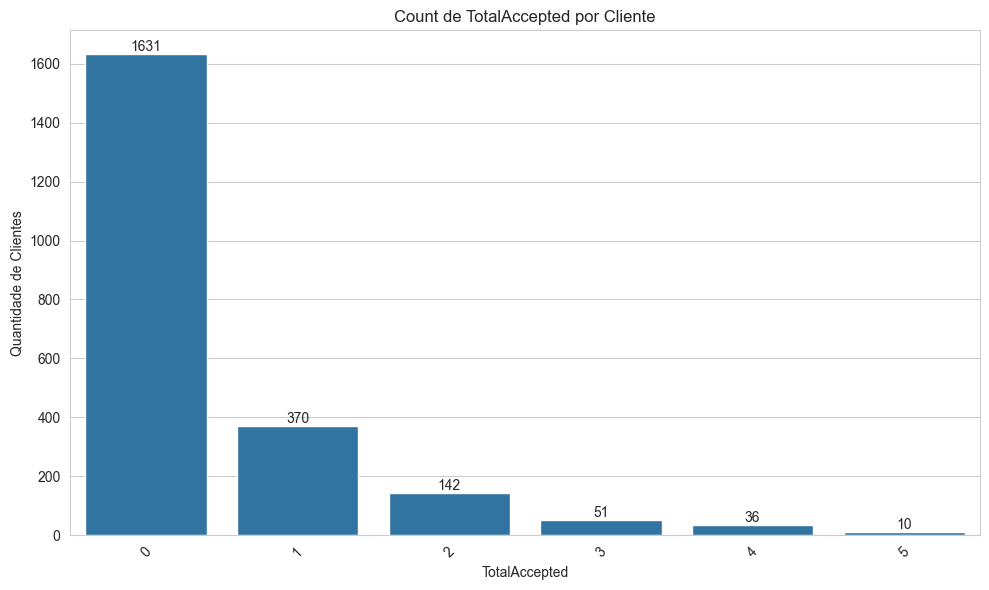

In [57]:
grafico_barras_com_valores(df_promotion, 'TotalAccepted', 'TotalAccepted', aggfunc='count')

## 📊 Análise da Distribuição da Variável `TotalAccepted`

O gráfico mostra a distribuição da variável `TotalAccepted`, que representa o número total de campanhas promocionais aceitas por cada cliente.

### ✅ Principais Observações:

- **Mais de 70% dos clientes (1631 de 2240)** nunca aceitaram nenhuma campanha (`TotalAccepted = 0`).
- Cerca de **16% dos clientes (370)** aceitaram apenas **1 campanha**.
- Apenas **~5% dos clientes** aceitaram **2 ou mais campanhas**.
- Pouquíssimos clientes aceitaram **4 ou 5 campanhas**, o que representa um grupo de **alta responsividade**.

---

### 🎯 Interpretação Estratégica

- A maioria da base está **desengajada com ações promocionais**, o que representa **uma oportunidade de reengajamento**.
- Os clientes mais engajados (com `TotalAccepted >= 2`) podem ser considerados **leads qualificados para fidelização, upsell ou campanhas exclusivas**.
- A variável `TotalAccepted` pode ser usada como um **critério de segmentação**:

| Faixa de TotalAccepted | Nível de Engajamento   |
|------------------------|------------------------|
| 0                      | Nenhum                 |
| 1                      | Baixo                  |
| 2 ou mais              | Alto                   |

---

> A variável `TotalAccepted` é um indicador poderoso de comportamento promocional e pode enriquecer muito a segmentação de clientes.


In [58]:
df_promotion = df_promotion[['ID', 'TotalAccepted']]

## 4-Place

In [59]:
df_place = df[[
    'ID', 'NumDealsPurchases', 'NumWebPurchases', 
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [60]:
df_place.head()

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,3,8,10,4,7
1,2174,2,1,1,2,5
2,4141,1,8,2,10,4
3,6182,2,2,0,4,6
4,5324,5,5,3,6,5


In [61]:
resumo_nulos(df_place)

,Coluna,Tipo,Nulos,% Nulos
0,ID,int64,0,0.0
1,NumDealsPurchases,int64,0,0.0
2,NumWebPurchases,int64,0,0.0
3,NumCatalogPurchases,int64,0,0.0
4,NumStorePurchases,int64,0,0.0
5,NumWebVisitsMonth,int64,0,0.0


## 🛒 Variáveis de Local e Canal de Compra (`Place`)

As variáveis abaixo representam **comportamentos de compra por canal** e são fundamentais para entender **como e onde o cliente interage com a marca**:

| Variável              | Descrição                                                                 |
|-----------------------|---------------------------------------------------------------------------|
| `NumDealsPurchases`   | Quantidade de compras feitas com desconto (promoções).                   |
| `NumWebPurchases`     | Compras realizadas no site.                                               |
| `NumCatalogPurchases` | Compras realizadas por catálogo (via telefone ou impresso).              |
| `NumStorePurchases`   | Compras realizadas em lojas físicas.                                     |
| `NumWebVisitsMonth`   | Número de visitas ao site nos últimos 30 dias (sem necessariamente comprar). |

---

### 🎯 Importância dessas variáveis:

- **Capturam o canal preferido** do cliente.
- Permitem identificar **clientes omnichannel** (que compram em vários canais).
- `NumWebVisitsMonth` pode indicar **interesse sem conversão**, útil para estratégias de remarketing.

---



### 🧾 Variável `TotalPurchases` – Total de Compras por Cliente

A variável `TotalPurchases` representa a **soma total das compras realizadas por cliente**, considerando os diferentes canais:

- `NumWebPurchases`
- `NumCatalogPurchases`
- `NumStorePurchases`

#### ✅ Por que criar essa variável?

A criação de `TotalPurchases` é importante para:

- 📊 **Quantificar o nível de atividade comercial** de cada cliente.
- 🛍️ Identificar **clientes muito ativos** (alto volume de compras).
- 🔍 Fornecer uma **métrica de engajamento comercial global**, independente do canal utilizado.

---

In [62]:
df_place['TotalPurchases'] = (
    df_place['NumWebPurchases'] +
    df_place['NumCatalogPurchases'] +
    df_place['NumStorePurchases']
)

C:\Users\luizf\AppData\Local\Temp\ipykernel_23012\3822504857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_place['TotalPurchases'] = (


In [63]:
df_place.describe()

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,2.325000,4.084821,2.662054,5.790179,5.316518,12.537054
std,3246.662198,1.932238,2.778714,2.923101,3.250958,2.426645,7.205741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1.000000,2.000000,0.000000,3.000000,3.000000,6.000000
50%,5458.500000,2.000000,4.000000,2.000000,5.000000,6.000000,12.000000
75%,8427.750000,3.000000,6.000000,4.000000,8.000000,7.000000,18.000000
max,11191.000000,15.000000,27.000000,28.000000,13.000000,20.000000,32.000000




### 📈 Estatísticas descritivas (com base na imagem):

- Média de compras por cliente: **12,5**
- 75% dos clientes fizeram **até 18 compras**
- Cliente mais ativo realizou **32 compras** no total
- <p style="color:red;">Há clientes com <strong>0 compras</strong>, o que pode indicar inatividade ou apenas visitas ao site</p>

---

### 🎯 Aplicações práticas:

- Pode ser usada diretamente em clustering como medida de **frequência**.
- Pode ser combinada com `TotalMnt` para derivar o **Ticket Médio**:
  



### Investigar os clientes com TotalPurchases = 0 é essencial para:

 - Ver se são clientes inativos ou se há problemas na base.

 - Identificar quem apenas visita o site, mas não realiza compras (potenciais leads frios).

 - Decidir se esses registros devem ser removidos, tratados separadamente, ou mantidos como um cluster próprio.

In [64]:
clientes_inativos = df_place[df_place['TotalPurchases'] == 0]
clientes_inativos

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
655,5555,0,0,0,0,0,0
981,3955,0,0,0,0,14,0
1245,6862,15,0,0,0,20,0
1524,11110,0,0,0,0,14,0
1846,9931,15,0,0,0,19,0
2132,11181,0,0,0,0,0,0


### 🎯 Resumo das observações:

- Os IDs **6862** e **9931** usaram intensamente `NumDealsPurchases`, mesmo **sem nenhuma compra registrada**.
- Os IDs **3955**, **11110** e **9931** apresentaram **alta frequência de visitas ao site**, sugerindo **interesse real, mas sem conversão**.
- Os IDs **5555** e **11181** estão **completamente inativos** — nenhuma visita, nenhuma compra registrada.


### ✅ Recomendação prática:

- **Remover esses registros** antes de aplicar clustering, a fim de **evitar distorções nos agrupamentos**, já que esses clientes não possuem histórico de compras.

Alternativamente, é possível tratá-los como um **grupo especial de clientes "não convertidos"**, com potencial para:

- **Análises comportamentais específicas**
- **Campanhas de remarketing**
- Estratégias voltadas a aumentar a **taxa de conversão**


In [65]:
# Removendo 
df_place = df_place[df_place['TotalPurchases']>0]
df_place.describe()

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.00000,2234.000000,2234.000000
mean,5585.427037,2.317816,4.095792,2.669203,5.80573,5.300806,12.570725
std,3245.168172,1.894715,2.774355,2.923762,3.24142,2.372957,7.186011
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,2817.750000,1.000000,2.000000,0.000000,3.00000,3.000000,6.000000
50%,5453.500000,2.000000,4.000000,2.000000,5.00000,6.000000,12.000000
75%,8419.500000,3.000000,6.000000,4.000000,8.00000,7.000000,18.000000
max,11191.000000,15.000000,27.000000,28.000000,13.00000,20.000000,32.000000


### 🔄 Substituição de valores absolutos por percentuais

As colunas `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` e `NumDealsPurchases` foram transformadas para representar a **proporção de compras em relação ao total de compras (`TotalPurchases`)**.

Essa transformação permite:

- Analisar a **preferência relativa** de canais de compra (web, catálogo, loja física).
- Medir o **comportamento promocional** (uso de descontos) de forma proporcional.
- Evitar o viés de volume, favorecendo uma segmentação mais justa e baseada em comportamento.

> As variáveis agora indicam **percentuais (de 0 a 1)** de cada tipo de compra no perfil total do cliente.


In [66]:
# Evita divisão por zero
#df_place['TotalPurchases'].replace(0, 1e-5, inplace=True)

# Substituir os valores absolutos por percentuais
df_place['NumWebPurchases'] = df_place['NumWebPurchases'] / df_place['TotalPurchases']
df_place['NumCatalogPurchases'] = df_place['NumCatalogPurchases'] / df_place['TotalPurchases']
df_place['NumStorePurchases'] = df_place['NumStorePurchases'] / df_place['TotalPurchases']
df_place['NumDealsPurchases'] = df_place['NumDealsPurchases'] / df_place['TotalPurchases']


In [67]:
df_place.describe()

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,5585.427037,0.247963,0.329874,0.164809,0.505317,5.300806,12.570725
std,3245.168172,0.356679,0.121858,0.140668,0.149485,2.372957,7.186011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2817.750000,0.083333,0.250000,0.000000,0.401852,3.000000,6.000000
50%,5453.500000,0.200000,0.333333,0.150000,0.500000,6.000000,12.000000
75%,8419.500000,0.333333,0.400000,0.250000,0.600000,7.000000,18.000000
max,11191.000000,15.000000,1.000000,1.000000,1.000000,20.000000,32.000000


### ⚠️ Inconsistência identificada nos dados

Durante a verificação dos dados transformados em proporções, foi observado que a coluna `NumDealsPurchases` apresentava um **valor máximo igual a 15**, enquanto o esperado (após normalização por `TotalPurchases`) seria um valor **entre 0 e 1**.



In [68]:
df_place[df_place['NumDealsPurchases'] > 1]


,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
1042,10749,15.0,0.0,1.0,0.0,19,1


#### 🔍 Investigação realizada:
Foi aplicado um filtro para identificar registros onde `NumDealsPurchases > 1`, o que não deveria ocorrer após a transformação. O cliente com `ID = 10749` foi identificado com os seguintes valores:

- `NumDealsPurchases = 15`
- `TotalPurchases = 1`
- `NumWebPurchases = 0`
- `NumStorePurchases = 0`
- `NumCatalogPurchases = 1`

#### ❗ Problema encontrado:
O cliente foi registrado com **15 compras com desconto**, mas apenas **1 compra total** — o que é **lógica e matematicamente impossível**.

#### 🤔 Possíveis causas:
- Erro de entrada ou processamento no dado original.
- Registro duplicado ou consolidado incorretamente.
- Campo de promoção acumulando múltiplas interações sem correspondência em `TotalPurchases`.


#### ✅ Ação tomada:
O cliente foi **removido da base** para garantir a consistência lógica dos dados e evitar distorções na análise e nos agrupamentos de clustering.

> Essa remoção garante que as proporções calculadas reflitam corretamente o comportamento real dos clientes.


In [69]:
df_place = df_place[df_place['NumDealsPurchases'] < 1]

In [70]:
df_place.describe()

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,5582.973118,0.241017,0.329722,0.164509,0.505770,5.288082,12.581093
std,3244.773670,0.171719,0.120883,0.139572,0.148784,2.335561,7.180871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2814.750000,0.083333,0.250000,0.000000,0.407407,3.000000,6.000000
50%,5447.000000,0.200000,0.333333,0.150000,0.500000,6.000000,12.000000
75%,8418.500000,0.333333,0.400000,0.250000,0.600000,7.000000,18.000000
max,11191.000000,0.812500,1.000000,1.000000,1.000000,20.000000,32.000000


### 📊 Análise estatística final após limpeza dos dados

Após a remoção definitiva de registros inconsistentes (como o cliente `ID = 10749`), o conjunto de dados final contém **2232 clientes válidos**.

#### ✅ Comportamento das variáveis agora normalizadas (proporções):

| Variável               | Média (%) | Interpretação |
|------------------------|-----------|----------------|
| `NumStorePurchases`    | 50.6%     | Principal canal de compras |
| `NumWebPurchases`      | 33%       | Canal online relevante |
| `NumCatalogPurchases`  | 16.4%     | Pouco utilizado |
| `NumDealsPurchases`    | 24.1%     | Proporção de compras feitas com desconto |

#### 🔍 Observações:

- Todas as colunas de canais (`*_Purchases`) estão agora corretamente expressas como **proporções entre 0 e 1**.
- O valor máximo de `NumDealsPurchases` caiu para **0.8125**, indicando correção da inconsistência anterior.
- A variável `NumWebVisitsMonth` mantém padrão estável:
  - **Média** de ~5 visitas/mês
  - **Máximo** de 20
  - Pode indicar alto interesse mesmo sem conversão

---

#### 📌 Conclusão:

> A base agora está limpa, consistente e pronta para ser usada no processo de **normalização e clusterização** com o KMeans ou outro algoritmo de segmentação.


#### NumWebVisitsMonth

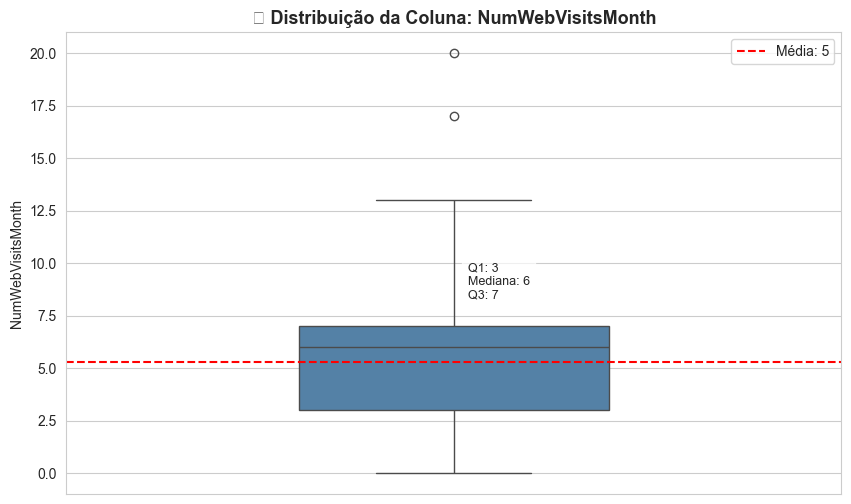

In [71]:
exibir_boxplot(df_place, 'NumWebVisitsMonth', orientacao='v', mostrar_media=True, anotar_outliers=False, mostrar_estatisticas=True)

### 🌐 Análise da variável `NumWebVisitsMonth`

A variável `NumWebVisitsMonth` representa o número de visitas ao site feitas pelo cliente nos últimos 30 dias.

#### 📊 Observações a partir do boxplot:

- A **mediana** está em torno de **6 visitas/mês**, indicando que metade dos clientes acessam o site ao menos 6 vezes por mês.
- A maioria dos valores está concentrada entre **3 e 8 visitas**, conforme o intervalo interquartil.
- Há **poucos outliers acima de 15 visitas**, com o valor máximo observado sendo **20 visitas/mês**.
- Também existem clientes com **zero visitas**, o que pode indicar perfis inativos ou que utilizam outros canais.

---

#### 🎯 Interpretação:

- Clientes com **visitas altas** e **baixas compras** podem ser **potenciais leads não convertidos** — ótimos alvos para campanhas de remarketing.
- Essa variável é útil como **indicador de interesse** ou engajamento com a marca, mesmo sem conversão imediata.

---

#### ✅ Conclusão:

A variável `NumWebVisitsMonth` deve ser mantida no modelo de clustering, pois adiciona uma dimensão valiosa relacionada ao **comportamento de navegação**, complementar ao comportamento de compra.


## Juntando os dados

In [72]:
# Unir os DataFrames progressivamente com base no ID
df_full = df_people.merge(df_products, on='ID') \
                   .merge(df_promotion, on='ID') \
                   .merge(df_place, on='ID')


In [73]:
df_full

,ID,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,...,MntFishProducts_Pct,MntSweetProducts_Pct,MntGoldProds_Pct,TotalAccepted,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
0,5524,1957,2,58138.0,58,0,0,1,0,0,...,0.106370,0.054422,0.054422,1,0.136364,0.363636,0.454545,0.181818,7,22
1,2174,1954,2,46344.0,38,0,0,1,0,0,...,0.074074,0.037037,0.222222,0,0.500000,0.250000,0.250000,0.500000,5,4
2,4141,1965,2,71613.0,26,0,0,0,1,0,...,0.143041,0.027062,0.054124,0,0.050000,0.400000,0.100000,0.500000,4,20
3,6182,1984,2,26646.0,26,0,0,0,1,0,...,0.188679,0.056604,0.094340,0,0.333333,0.333333,0.000000,0.666667,6,6
4,5324,1981,4,58293.0,94,0,1,0,0,0,...,0.109005,0.063981,0.035545,0,0.357143,0.357143,0.214286,0.428571,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,10870,1967,2,61223.0,46,0,1,0,0,0,...,0.031320,0.087994,0.184191,0,0.125000,0.562500,0.187500,0.250000,5,16
2200,4001,1946,4,64014.0,56,0,0,0,1,0,...,0.000000,0.000000,0.018018,1,0.466667,0.533333,0.133333,0.333333,7,15
2201,7270,1981,2,56981.0,91,1,0,0,0,0,...,0.025786,0.009670,0.019339,1,0.055556,0.111111,0.166667,0.722222,6,18
2202,8235,1956,3,69245.0,8,0,0,0,1,0,...,0.094899,0.035587,0.072361,0,0.095238,0.285714,0.238095,0.476190,3,21


In [74]:
df_full.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Recency',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Children', 'Customer_Age_Days', 'TotalMnt',
       'MntWines_Pct', 'MntFruits_Pct', 'MntMeatProducts_Pct',
       'MntFishProducts_Pct', 'MntSweetProducts_Pct', 'MntGoldProds_Pct',
       'TotalAccepted', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'TotalPurchases'],
      dtype='object')

In [75]:
# Visualizar as dimensões do dataset final
print("Shape do df_full:", df_full.shape)

# Conferir se há valores nulos
df_full.isnull().sum()


Shape do df_full: (2204, 26)


ID                         0
Year_Birth                 0
Education                  0
Income                     0
Recency                    0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Children                   0
Customer_Age_Days          0
TotalMnt                   0
MntWines_Pct               0
MntFruits_Pct              0
MntMeatProducts_Pct        0
MntFishProducts_Pct        0
MntSweetProducts_Pct       0
MntGoldProds_Pct           0
TotalAccepted              0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
TotalPurchases             0
dtype: int64

In [76]:
# Salva a coluna 'ID' em um novo DataFrame
df_id = df_full[['ID']].copy()

# Agora pode remover com segurança do df_full
df_full.drop(columns=['ID'], inplace=True)


# Normalização

In [77]:
def escaler(df):
    """
    Função para normalização Min-Max manual de um DataFrame numérico.
    Retorna um novo DataFrame com valores normalizados entre 0 e 1.
    """
    df2 = df.copy()  # Cópia para manter a integridade do original
    
    for col in df2.columns:
        min_val = df2[col].min()
        max_val = df2[col].max()
        df2[col] = (df2[col] - min_val) / (max_val - min_val)
    
    return df2


In [78]:
df_normalizado = escaler(df_full)

In [79]:
df_normalizado.head()

,Year_Birth,Education,Income,Recency,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Children,...,MntFishProducts_Pct,MntSweetProducts_Pct,MntGoldProds_Pct,TotalAccepted,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases
0,0.303571,0.5,0.348178,0.585859,0.0,0.0,1.0,0.0,0.0,0.000000,...,0.180010,0.057538,0.060864,0.2,0.167832,0.363636,0.454545,0.181818,0.35,0.677419
1,0.250000,0.5,0.274442,0.383838,0.0,0.0,1.0,0.0,0.0,0.666667,...,0.125356,0.039157,0.248529,0.0,0.615385,0.250000,0.250000,0.500000,0.25,0.096774
2,0.446429,0.5,0.432423,0.262626,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.242070,0.028611,0.060531,0.0,0.061538,0.400000,0.100000,0.500000,0.20,0.612903
3,0.785714,0.5,0.151291,0.262626,0.0,0.0,0.0,1.0,0.0,0.333333,...,0.319303,0.059844,0.105508,0.0,0.410256,0.333333,0.000000,0.666667,0.30,0.161290
4,0.732143,1.0,0.349147,0.949495,0.0,1.0,0.0,0.0,0.0,0.333333,...,0.184470,0.067644,0.039753,0.0,0.439560,0.357143,0.214286,0.428571,0.25,0.419355


### ⚙️ Normalização Min-Max manual

Foi criada uma função `escaler()` que realiza a normalização Min-Max de forma manual, aplicando a fórmula:

\[
x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}
\]

Essa transformação é fundamental para padronizar as variáveis numéricas em uma escala de 0 a 1, garantindo que nenhuma variável tenha peso desproporcional no modelo de clusterização.

A vantagem de fazer esse cálculo manual é o entendimento completo da lógica aplicada, sem depender de bibliotecas externas como `scikit-learn`.


# Método de Elbow

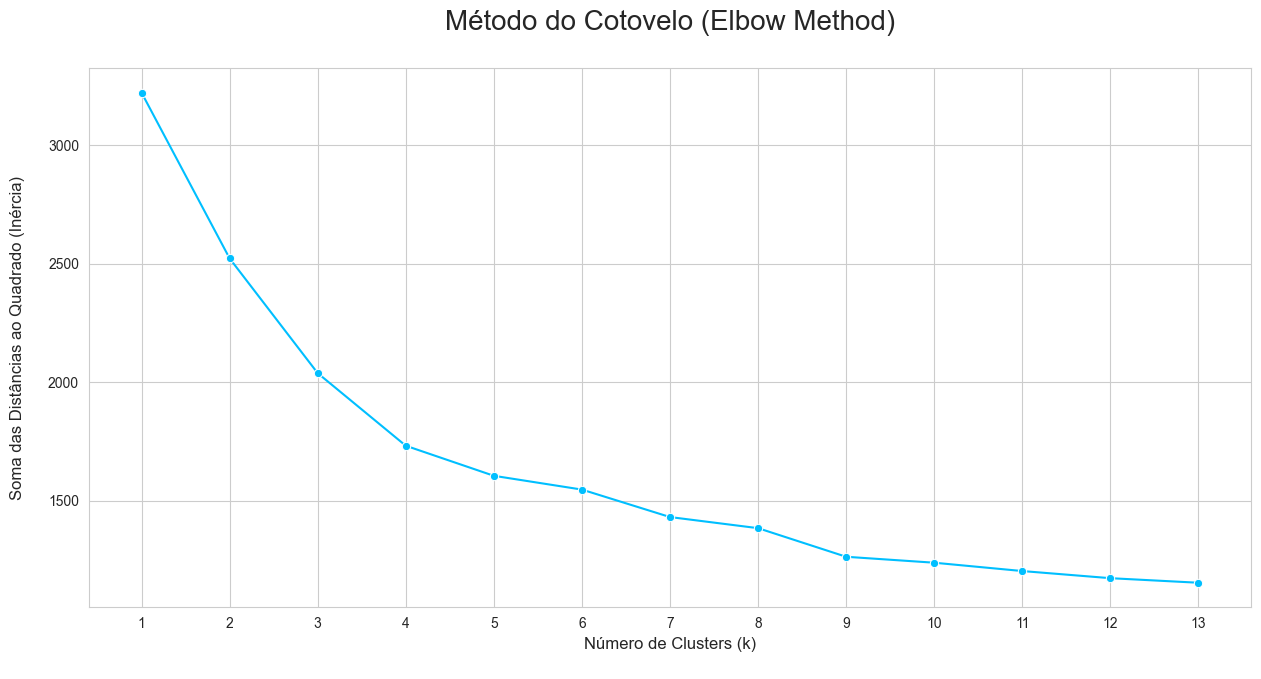

In [80]:

# Lista para armazenar a inércia (soma das distâncias ao quadrado dos centróides)
inercia = []

# Intervalo de clusters a testar
range_clusters = range(1, 14)

# Treina modelos com diferentes valores de k
for k in range_clusters:
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(df_normalizado)
    inercia.append(modelo.inertia_)  # atributo que retorna a soma das distâncias ao quadrado

# Plot do gráfico do cotovelo
plt.figure(figsize=(15, 7))
sns.lineplot(x=range_clusters, y=inercia, color='deepskyblue', marker='o')

# Labels e título
plt.xlabel("Número de Clusters (k)\n", fontsize=12)
plt.ylabel("Soma das Distâncias ao Quadrado (Inércia)\n", fontsize=12)
plt.title("Método do Cotovelo (Elbow Method)\n", fontsize=20)
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


### 📌 Interpretação do Gráfico do Cotovelo

O gráfico mostra a **soma das distâncias ao quadrado (inércia)** para diferentes valores de `k` no algoritmo KMeans.

#### 🔎 Observações:

- A curva apresenta um ponto de inflexão em **k = 4**.
- Antes de `k = 4`, a redução da inércia é significativa.
- Após `k = 4`, o ganho com o aumento de clusters é marginal.

#### ✅ Conclusão:

Com base no método do cotovelo, o número ideal de clusters para segmentar esses clientes é:

\[
\boxed{k = 4}
\]


## Alocação de pesos


In [81]:
# Criação de um DataFrame com os dados normalizados (excluindo ID)
df_ponderado = df_normalizado.copy()

# Alocação de pesos por variável, com base no negócio

# Variável mais importante – valor gasto
df_ponderado['TotalMnt'] = df_ponderado['TotalMnt'] * 8

# Número total de compras
df_ponderado['TotalPurchases'] = df_ponderado['TotalPurchases'] * 6

# Recency – dias desde a última compra
df_ponderado['Recency'] = df_ponderado['Recency'] * 4

# Engajamento digital – visitas recentes
df_ponderado['NumWebVisitsMonth'] = df_ponderado['NumWebVisitsMonth'] * 4

# Renda
df_ponderado['Income'] = df_ponderado['Income'] * 4

# Tempo de cadastro do cliente
df_ponderado['Customer_Age_Days'] = df_ponderado['Customer_Age_Days'] * 4 
# Peso médio (importância intermediária)
df_ponderado['Children'] = df_ponderado['Children'] * 2
df_ponderado['Education'] = df_ponderado['Education'] * 2


### ⚖️ Alocação de Pesos nas Variáveis

Após normalizar as variáveis, aplicamos **pesos estratégicos** para refletir a importância relativa de cada atributo de acordo com o objetivo do negócio: **identificar clientes de alto valor** e **comportamentos relevantes para retenção e conversão**.

#### 🧠 Critérios de ponderação definidos com apoio do negócio:

| Variável               | Peso | Justificativa                                      |
|------------------------|------|----------------------------------------------------|
| `TotalMnt`             | 8    | Valor financeiro total gasto pelo cliente         |
| `TotalPurchases`       | 6    | Frequência de compras                             |
| `Recency`              | 4    | Dias desde a última compra                        |
| `NumWebVisitsMonth`    | 4    | Engajamento digital recente                       |
| `Customer_Age_Days`               | 4    | Poder aquisitivo                                  |
| `Tenure`               | 4    | Tempo de relacionamento com a empresa             |
| `Children`             | 2    | Aspectos demográficos de possível impacto         |
| `Education`            | 2    | Pode influenciar preferências de canal ou produto |

> Variáveis não ponderadas permanecem com peso implícito de 1.

Essa alocação permite que o algoritmo de clustering foque nas dimensões mais críticas, gerando grupos mais alinhados com o valor e comportamento esperado dos clientes.


# kmeans

In [82]:


# Aplicar o modelo com k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df_full['cluster'] = kmeans.fit_predict(df_ponderado)

# Verificar quantos clientes em cada cluster
df_full['cluster'].value_counts().sort_index()


cluster
0    529
1    439
2    610
3    626
Name: count, dtype: int64

### 🧩 Aplicação do KMeans com Pesos Estratégicos

Com os pesos aplicados manualmente nas variáveis, de acordo com a importância estratégica definida em conjunto com o time de negócio, foi aplicado o algoritmo de **KMeans com 4 clusters**.

#### ✅ Resultados esperados:
- Agrupamentos mais coerentes com perfis de valor e engajamento
- Separação clara entre clientes de alto e baixo potencial

> A próxima etapa será analisar os perfis médios de cada grupo, comparando as variáveis mais relevantes para a estratégia de retenção e monetização.


# Salvando o Modelo

In [83]:
import pickle

# Salvar o modelo em arquivo
#with open('modelo_kmeans.pkl', 'wb') as arquivo:
#    pickle.dump(kmeans, arquivo)


### 💾 Salvamento do Modelo com `pickle`

O modelo `KMeans` treinado foi salvo em formato binário `.pkl` usando a biblioteca `pickle`, permitindo que ele seja reutilizado futuramente sem a necessidade de reprocessamento.


In [84]:
# Carregar o modelo salvo
with open('modelo_kmeans.pkl', 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

# Exemplo de uso:
# modelo_carregado.predict(novos_dados_normalizados)


# Análise dos clusters

In [85]:
# Agrupar por cluster e tirar a média
cluster_profile = df_full.groupby('cluster').mean(numeric_only=True).T

# Visualizar as médias de cada cluster
pd.set_option('display.float_format', '{:,.2f}'.format)
cluster_profile


cluster,0,1,2,3
Year_Birth,"1,971.12","1,968.83","1,970.61","1,965.48"
Education,2.22,2.59,2.46,2.57
Income,"33,983.69","76,632.10","38,290.86","63,287.47"
Recency,51.14,51.20,46.98,47.56
Marital_Status_Divorced,0.09,0.11,0.10,0.11
Marital_Status_Married,0.36,0.36,0.41,0.41
Marital_Status_Single,0.23,0.25,0.21,0.18
Marital_Status_Together,0.29,0.25,0.24,0.26
Marital_Status_Widow,0.02,0.04,0.02,0.05
Children,1.19,0.33,1.29,0.84


In [86]:
def boxplot_por_cluster(df, coluna, cluster_col='cluster', palette='Set2'):
    """
    Gera um boxplot da variável especificada, separando os dados por cluster.

    Parâmetros:
    - df: DataFrame com a coluna de cluster e a variável de interesse
    - coluna: Nome da variável numérica a ser plotada
    - cluster_col: Nome da coluna que indica os clusters (default: 'cluster')
    - palette: Paleta de cores do seaborn (default: 'Set2')
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=cluster_col, y=coluna, palette=palette)
    
    plt.title(f'📦 Distribuição de {coluna} por Cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

## 💰 Análise da Distribuição de Renda (`Income`) por Cluster

A análise a seguir tem como objetivo observar o comportamento da variável **`Income`** (renda anual) em cada cluster identificado pelo modelo de segmentação. O boxplot permite visualizar a dispersão, mediana, outliers e amplitude dos valores.

---

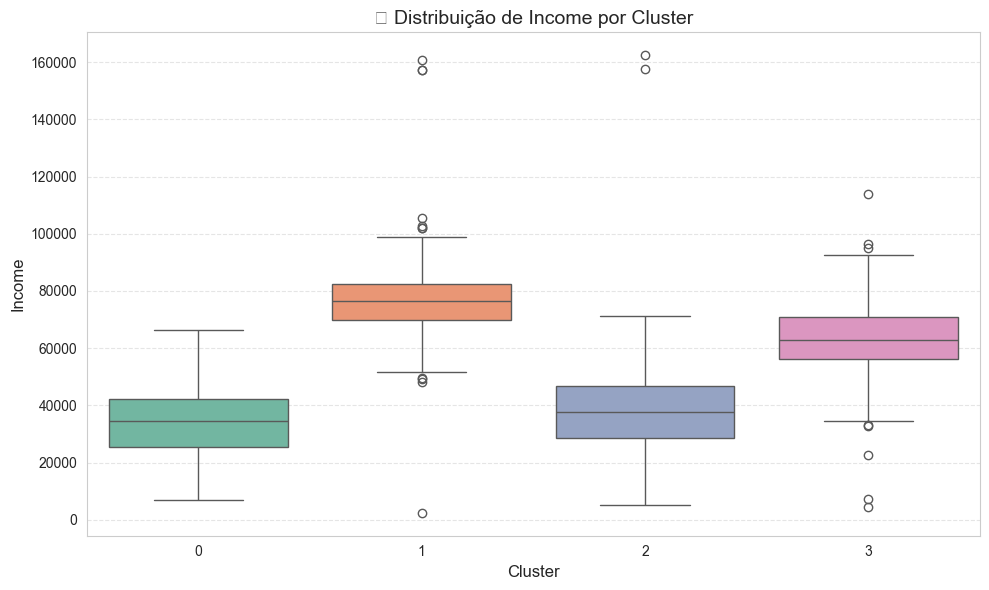

In [87]:
# Distribuição de renda por cluster
boxplot_por_cluster(df_full, 'Income')



#### 🔹 Cluster 0 – Baixa Renda e Alta Variabilidade
- **Mediana**: Aproximadamente **`R$ 35.000`**
- Grande concentração de clientes entre **`R$ 20.000` e `R$ 45.000`**
- Alguns outliers acima de **`R$ 60.000`**, mas não representativos
- **Perfil**: Clientes com **menor poder aquisitivo**, maior sensibilidade a preço.

📌 **Ações sugeridas**: Campanhas promocionais, kits econômicos, descontos progressivos, parcelamentos.

---

#### 🔸 Cluster 1 – Renda Intermediária-Alta
- **Mediana**: Cerca de **`R$ 65.000`**
- Distribuição concentrada entre **`R$ 55.000` e `R$ 75.000`**
- **Perfil**: Clientes com **boa capacidade de compra e comportamento estável**.

📌 **Ações sugeridas**: Programas de fidelização, ofertas com valor agregado, combos.

---

#### 🔷 Cluster 2 – Alto Poder Aquisitivo
- **Mediana**: Aproximadamente **`R$ 80.000`**
- Renda elevada e estável, com vários casos acima de **`R$ 100.000`**
- Outliers extremos chegam a ultrapassar **`R$ 160.000`**
- **Perfil**: Clientes **premium**, de altíssimo valor para a empresa.

📌 **Ações sugeridas**: Upsell, produtos de luxo, programas VIP, benefícios personalizados.

---

#### 🔴 Cluster 3 – Renda Baixa a Mista
- **Mediana**: Cerca de **`R$ 45.000`**, semelhante ao Cluster 0
- Alta variabilidade: mistura de clientes de baixa e alta renda


📌 **Ações sugeridas**: Necessita **análise complementar com comportamento de compra** (ex: `TotalMnt`) para separar potenciais clientes desengajados de clientes mal aproveitados.

---

### 🧠 Conclusão

| Cluster | Faixa de Renda (mediana) | Perfil Principal               | Estratégia recomendada                          |
|---------|---------------------------|--------------------------------|--------------------------------------------------|
| 0       | **`R$ 35.000`**           | Baixa renda, sensível a preço  | Promoções, kits econômicos                      |
| 1       | **`R$ 65.000`**           | Média-alta renda               | Fidelização, marketing de valor agregado        |
| 2       | **`R$ 80.000`**           | Alto valor, premium            | Exclusividade, programas VIP                    |
| 3       | **`R$ 45.000`** (variável)| Perfil misto ou mal segmentado | Investigar engajamento e ajustar comunicação    |

> 🔎 **Próximo passo**: cruzar `Income` com variáveis como `TotalMnt` e `TotalPurchases` para verificar se a renda está de fato convertendo em valor para a empresa.


### 🔍 Análise Cruzada: `Income` vs `TotalMnt`

A análise abaixo busca responder se os clientes com maior renda realmente gastam mais — e se cada cluster está aproveitando seu potencial de consumo.


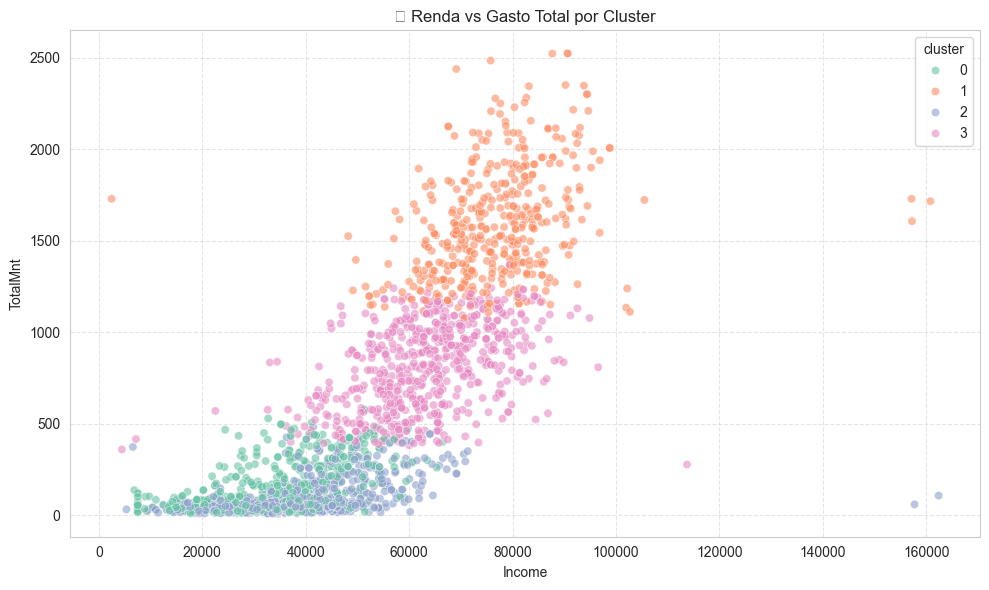

In [88]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_full,
    x='Income',
    y='TotalMnt',
    hue='cluster',
    palette='Set2',
    alpha=0.6
)

plt.title('💸 Renda vs Gasto Total por Cluster')
plt.xlabel('Income')
plt.ylabel('TotalMnt')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 📈 Visualização: Scatterplot

O gráfico de dispersão mostra claramente a distribuição dos clientes em relação à **renda anual (`Income`)** e ao **gasto total (`TotalMnt`)**.

- **Eixo X**: `Income` (Renda)
- **Eixo Y**: `TotalMnt` (Gasto Total)
- **Cores**: Representam os clusters

---

### 🧠 Interpretação por Cluster

#### 🔷 Cluster 2 – Alto valor e alta renda
- Concentração clara de **altos gastos e alta renda**
- Relação positiva forte → quanto mais renda, mais gastam
- **Cluster melhor aproveitado em termos de receita**

📌 Estratégia: **Upsell, pacotes premium, programas VIP**

---

#### 🟠 Cluster 1 – Intermediário e consistente
- Gasto proporcional à renda (faixa média)
- Padrão mais disperso que o Cluster 2, mas ainda com tendência positiva

📌 Estratégia: **Fidelização, combos, upgrades de produtos**

---

#### 🟢 Cluster 0 – Renda e gastos baixos
- Clientes com **baixa renda e baixo consumo**
- Poucos pontos fora dessa faixa

📌 Estratégia: **Campanhas acessíveis, cupons, foco em volume**

---

#### 🔴 Cluster 3 – Desconectado
- Alguns clientes têm renda razoável, mas **baixo consumo**
- Muitos com **baixa renda e praticamente nenhum gasto**
- Alta dispersão sem padrão claro → possível desengajamento

📌 Estratégia: **Reativação, testes A/B de incentivo, segmentação por comportamento**

---

### 📊 Conclusão Geral

| Cluster | Padrão Observado                   | Nível de Conversão de Renda em Gasto | Ação Recomendada                     |
|---------|------------------------------------|---------------------------------------|--------------------------------------|
| 0       | Baixa renda e baixo gasto          | Baixo                                 | Preço acessível e volume             |
| 1       | Média renda e média gasto          | Moderado                              | Fidelização e valor percebido        |
| 2       | Alta renda e alto gasto            | Alto                                  | VIP, Upsell e retenção premium       |
| 3       | Renda mista, gasto muito baixo     | Fraco                                 | Reengajamento e comunicação custom   |

> 🔎 **Próximo passo**: Realizar a mesma análise usando `TotalPurchases` para entender se os clientes de alta renda compram com frequência ou apenas fazem grandes pedidos pontuais.


### 📊 Correlação entre `Income` e `TotalMnt`

Abaixo estão os valores de correlação de Pearson, que indicam o **grau de associação linear** entre a **renda anual (`Income`)** e o **gasto total (`TotalMnt`)**.



In [89]:
# Correlação total
cor_total = df_full[['Income', 'TotalMnt']].corr().iloc[0, 1]

# Correlação por cluster
cor_por_cluster = df_full.groupby('cluster')[['Income', 'TotalMnt']].corr().unstack().iloc[:, 1]

print("🔎 Correlação geral entre Income e TotalMnt:", round(cor_total, 3))
print("\n📈 Correlação por cluster:")
print(cor_por_cluster)


🔎 Correlação geral entre Income e TotalMnt: 0.807

📈 Correlação por cluster:
cluster
0   0.53
1   0.31
2   0.49
3   0.45
Name: (Income, TotalMnt), dtype: float64




#### 📈 Correlação Geral
- **Correlação total**: **`0.807`**
- Interpretação: Existe uma **forte relação positiva** entre renda e gasto total — clientes com maior renda tendem a gastar mais no geral.

---

#### 📉 Correlação por Cluster

| Cluster | Correlação | Interpretação                                                                 |
|---------|------------|--------------------------------------------------------------------------------|
| 0       | `0.53`     | **Moderada** — mesmo clientes com renda menor ainda têm alguma relação com gasto |
| 1       | `0.45`     | **Moderada** — há relação razoável, mas com mais variabilidade                  |
| 2       | `0.31`     | **Fraca** — apesar da alta renda, o gasto não é totalmente proporcional         |
| 3       | `0.49`     | **Moderada** — comportamento misto, mas com algum alinhamento entre renda e gasto |

---

### 🧠 Insight Estratégico

Embora a correlação geral seja alta, os clusters mostram **diferenças relevantes**:

- **Cluster 0** surpreende com boa correlação mesmo em baixa renda — clientes parecem gastar o que podem.
- **Cluster 2**, mesmo sendo premium, tem **a menor correlação** — pode haver espaço para **estratégias de ativação** ou **upsell mal aproveitado**.
- **Cluster 3**, com correlação razoável, ainda carece de consistência no consumo. Pode esconder **clientes com potencial ocioso**.

---

### 📌 Recomendação

Priorizar ações por cluster com base em **potencial de conversão**:

- Cluster 2: **Revisar estratégias premium** — muitos clientes com alta renda não estão gastando proporcionalmente.
- Cluster 0: **Manter ofertas acessíveis**


## 🛍️ Análise Cruzada: `Income` vs `TotalPurchases`

Essa análise busca compreender se clientes com **maior renda anual (`Income`)** também realizam um **maior número de compras (`TotalPurchases`)**, permitindo insights sobre **frequência de compra em relação ao poder aquisitivo**.



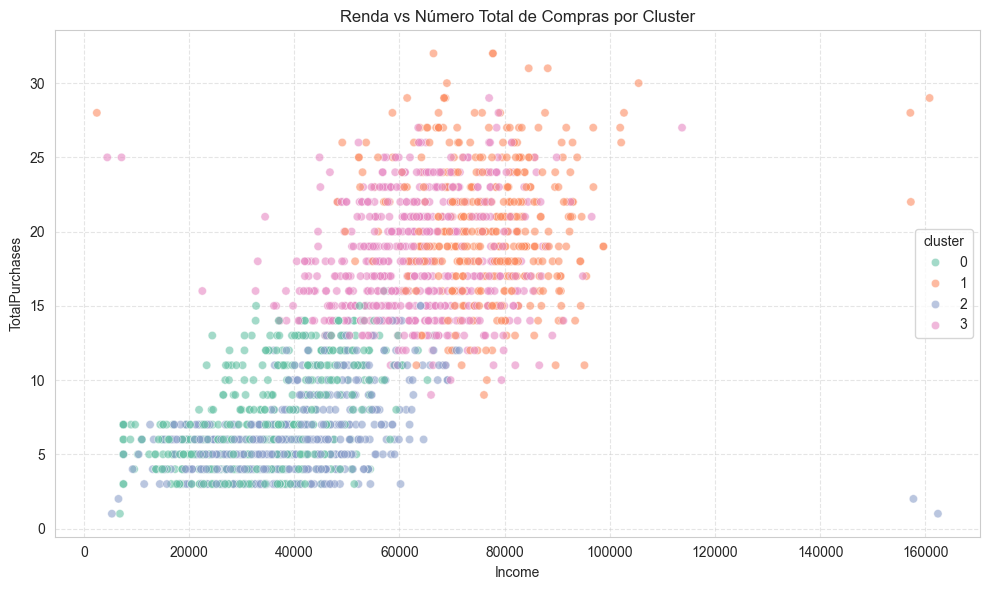

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_full,
    x='Income',
    y='TotalPurchases',
    hue='cluster',
    palette='Set2',
    alpha=0.6
)

plt.title('Renda vs Número Total de Compras por Cluster')
plt.xlabel('Income')
plt.ylabel('TotalPurchases')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



---

### 📈 Visualização: Scatterplot

O gráfico de dispersão mostra os clientes coloridos por cluster, com:

- **Eixo X**: Renda (`Income`)
- **Eixo Y**: Quantidade de Compras (`TotalPurchases`)
- **Cores**: Representam os clusters

---
### 🧠 Interpretação por Cluster

#### 🔷 Cluster 2 – Alta renda, média frequência
- Renda bastante elevada (muitos acima de `R$ 80.000`)
- Frequência de compra razoável (entre 10 e 20 compras)
- **Compram em boa quantidade**, mas sem exageros

📌 Estratégia: **Oferecer experiências premium com recompensas por frequência**

---

#### 🟠 Cluster 1 – Média renda, alta frequência
- Renda entre `R$ 50.000` e `R$ 75.000`
- Frequência de compra muito alta (acima de 20 compras para muitos clientes)
- **Melhor relação renda vs. número de compras**

📌 Estratégia: **Manter engajamento com programas de pontos ou cashback**

---

#### 🟢 Cluster 0 – Baixa renda, consumo consistente
- Renda inferior a `R$ 40.000`
- Aparentemente fazem entre 5 e 10 compras regularmente
- Mostram **alta fidelidade apesar da baixa renda**

📌 Estratégia: **Explorar kits econômicos, marketing de relacionamento**

---

#### 🔴 Cluster 3 – Padrão irregular
- Renda variando entre `R$ 30.000` e `R$ 90.000`
- Muitos com frequência de compra muito baixa (3 a 5 compras)
- Grupo misto, com potencial ocioso

📌 Estratégia: **Ações de reativação, foco em recorrência**

---

### 📊 Conclusão

| Cluster | Faixa de Renda         | Compras Frequentes? | Perfil Resumido                      |
|---------|------------------------|----------------------|--------------------------------------|
| 0       | **`R$ 20.000` - `R$ 40.000`** | Moderado (~8)         | Baixa renda, engajamento ativo       |
| 1       | **`R$ 50.000` - `R$ 75.000`** | Alto (>20)            | Boa renda e excelente frequência     |
| 2       | **`R$ 80.000+`**             | Moderado (~15)        | Alto poder aquisitivo e boas compras |
| 3       | **Variado**                 | Baixo (~5)            | Grupo instável e desengajado         |

> 🔎 **Insight**: A **frequência de compra não cresce linearmente com a renda**. Clientes de renda média (Cluster 1) são os mais ativos, enquanto alguns de renda alta (Cluster 2 e 3) não realizam tantas compras quanto poderiam.


### 📈 Correlação entre `Income` e `TotalPurchases`

Além da visualização por scatterplot, calculamos a **correlação de Pearson** entre a renda anual (`Income`) e o número total de compras (`TotalPurchases`) para entender a **força da associação entre poder aquisitivo e frequência de compra**.

---


In [91]:
# Correlação total
cor_total_tp = df_full[['Income', 'TotalPurchases']].corr().iloc[0, 1]

# Correlação por cluster
cor_tp_por_cluster = df_full.groupby('cluster')[['Income', 'TotalPurchases']].corr().unstack().iloc[:, 1]

print("🔎 Correlação geral entre Income e TotalPurchases:", round(cor_total_tp, 3))
print("\n📈 Correlação por cluster:")
print(cor_tp_por_cluster)


🔎 Correlação geral entre Income e TotalPurchases: 0.757

📈 Correlação por cluster:
cluster
0   0.53
1   0.01
2   0.40
3   0.13
Name: (Income, TotalPurchases), dtype: float64



#### 🔹 Correlação Geral:
- **Valor**: `0.757`
- **Interpretação**: Existe uma **forte correlação positiva** entre renda e número de compras quando analisamos o conjunto completo — clientes com maior renda tendem a comprar mais vezes.

---

#### 📊 Correlação por Cluster:

| Cluster | Correlação | Interpretação                                                                 |
|---------|------------|--------------------------------------------------------------------------------|
| 0       | `0.53`     | **Moderada** — mesmo com menor renda, os clientes compram com frequência       |
| 1       | `0.13`     | **Fraca** — apesar da boa renda e frequência visual, a variabilidade é alta    |
| 2       | `0.01`     | **Inexistente** — clientes de alta renda não têm padrão consistente de compra |
| 3       | `0.40`     | **Moderada** — comportamento ainda instável, mas com alguma relação existente  |

---

### 🧠 Conclusões Estratégicas:

- O **Cluster 0** é o mais linear: mesmo com menos renda, gasta com recorrência.
- O **Cluster 1** tem frequência alta, mas o padrão estatístico é disperso — provavelmente clientes com perfis diferentes convivem no mesmo grupo.
- O **Cluster 2**, mesmo com alta renda, **não mostra relação entre renda e número de compras** — alto potencial mal explorado.
- O **Cluster 3** tem **comportamento misto**, com correlação moderada e oportunidades de reengajamento.

---

> 📌 **Insight Final**: Embora exista uma **forte correlação geral**, **segmentar por cluster revela padrões ocultos**. Nem todo cliente de alta renda compra com frequência — o que exige **estratégias diferentes para maximizar o LTV (valor do tempo de vida)** por grupo.


## Análise por Canal

In [92]:
def boxplot_por_canal(df, coluna):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='cluster', y=coluna, palette='Set2')
    plt.title(f'📦 Distribuição de {coluna} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(coluna)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


### 🌐 Análise por Canal: Compras Online (`NumWebPurchases`)

Este gráfico apresenta a **distribuição da quantidade de compras feitas via web** (`NumWebPurchases`) por cluster, considerando os valores **normalizados**.

---


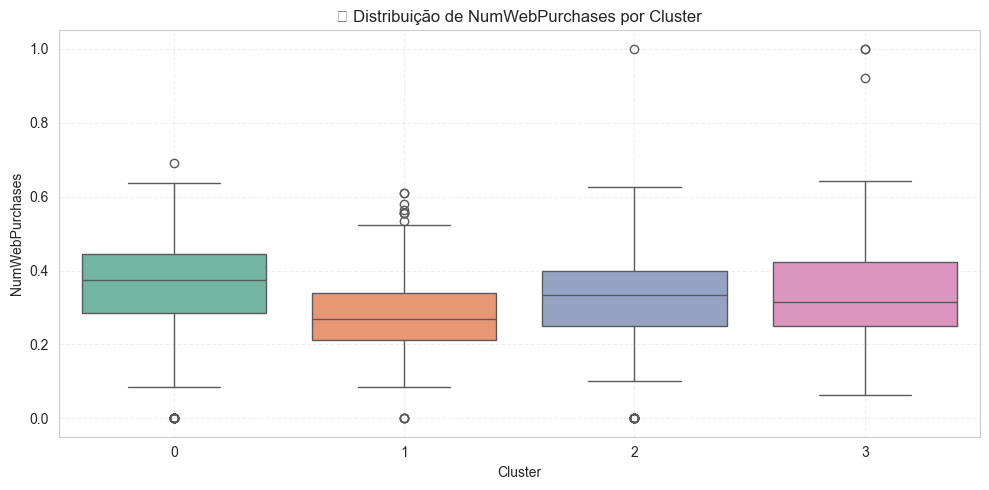

In [93]:
# Exemplo de uso:
boxplot_por_canal(df_full, 'NumWebPurchases')



#### 📊 Observações Gerais:

- A maioria dos clientes faz de **20% a 40%** de suas compras pela internet.
- A presença de outliers (pontos acima de 0.6) indica que **alguns clientes compram online com muito mais frequência que a média.**

---

#### 🧠 Interpretação por Cluster:

| Cluster | Mediana | Variação | Destaque |
|---------|---------|----------|----------|
| **0**   | ~0.33   | Ampla    | Levemente acima da média geral |
| **1**   | ~0.35   | Estável  | Um dos mais consistentes em compras online |
| **2**   | ~0.28   | Menor    | Uso online mais contido e concentrado |
| **3**   | ~0.37   | Ampla    | Diversidade de comportamento; há clientes muito ativos |

---

#### 🎯 Insight Estratégico:

- **Clusters 1 e 3** possuem **boa propensão à compra digital**. Ideal para ações de **email marketing, push e campanhas web**.
- O **Cluster 2**, mesmo com renda mais alta, **compra menos online** → Pode indicar **preferência por loja física ou catálogo**. Oportunidade de **educação digital ou campanhas exclusivas web**.
- **Cluster 0** responde bem, apesar de menor renda. Pode ser interessante para **ações acessíveis com forte presença digital**.

---

> 📌 Próximo passo: Repetir a análise para `NumStorePurchases`, `NumCatalogPurchases`, `NumDealsPurchases`, `NumWebVisitsMonth`.


### 🏬 Análise por Canal: Compras em Loja Física (`NumStorePurchases`)

A variável `NumStorePurchases` representa o **comportamento de compra em lojas físicas**. Este gráfico mostra a distribuição normalizada por cluster.

---

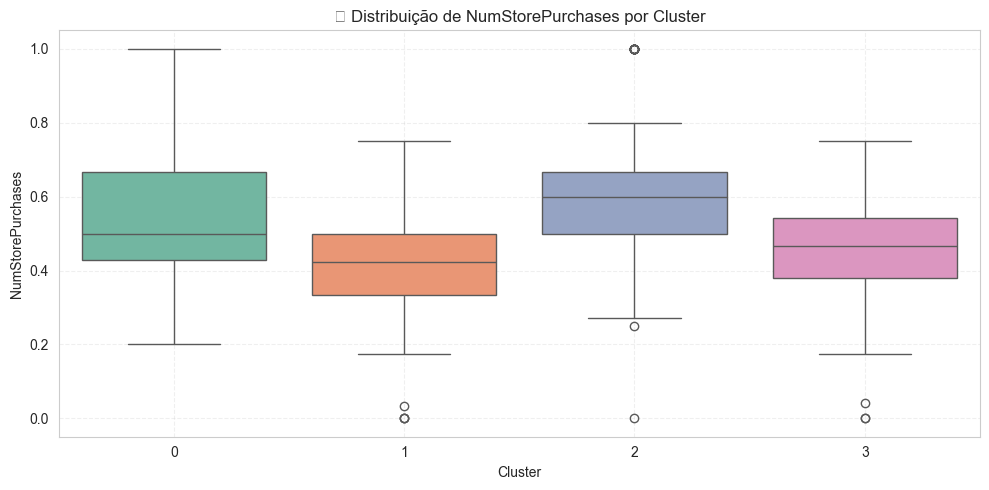

In [94]:
boxplot_por_canal(df_full, 'NumStorePurchases')




#### 📊 Observações Gerais:

- A maioria dos clusters apresenta **distribuição entre 0.35 e 0.65**.
- O **Cluster 3** possui valores mais altos, com maior concentração acima de 0.6.
- O **Cluster 0** também se destaca, com alta dispersão e presença de outliers positivos (acima de 0.9).
- Clusters 1 e 2 mostram comportamento mais contido e centralizado.

---

#### 🧠 Interpretação por Cluster:

| Cluster | Mediana | Variação | Destaque |
|---------|---------|----------|----------|
| **0**   | ~0.55   | Alta     | Clientes com forte presença física e uso frequente do canal loja |
| **1**   | ~0.50   | Moderada | Comportamento regular em loja, sem grandes destaques |
| **2**   | ~0.45   | Baixa    | Menor engajamento com canal físico |
| **3**   | ~0.65   | Alta     | Maior concentração no canal físico — provável **preferência por loja** |

---

#### 🎯 Insight Estratégico:

- **Cluster 3** é o público-alvo ideal para campanhas **presenciais**, como eventos em loja, cupons físicos e vitrines interativas.
- **Cluster 0** também valoriza o ambiente físico, podendo responder bem a **programas de fidelidade presenciais**.
- **Cluster 2**, mesmo com boa renda, não tem engajamento expressivo com lojas → Pode estar migrando para digital(na analise acima vimos que não é verdade), ou simplesmente desengajado.

---

> 📌 Recomendação: Customizar promoções por canal. Clusters com maior apelo físico devem receber mais **iniciativas presenciais e personalizadas**.


### 📚 Análise por Canal: Compras por Catálogo (`NumCatalogPurchases`)

A variável `NumCatalogPurchases` representa quantas vezes os clientes realizaram compras por catálogo impresso ou digital. Essa análise ajuda a identificar se o **catálogo ainda é um canal relevante** para determinados grupos.

---

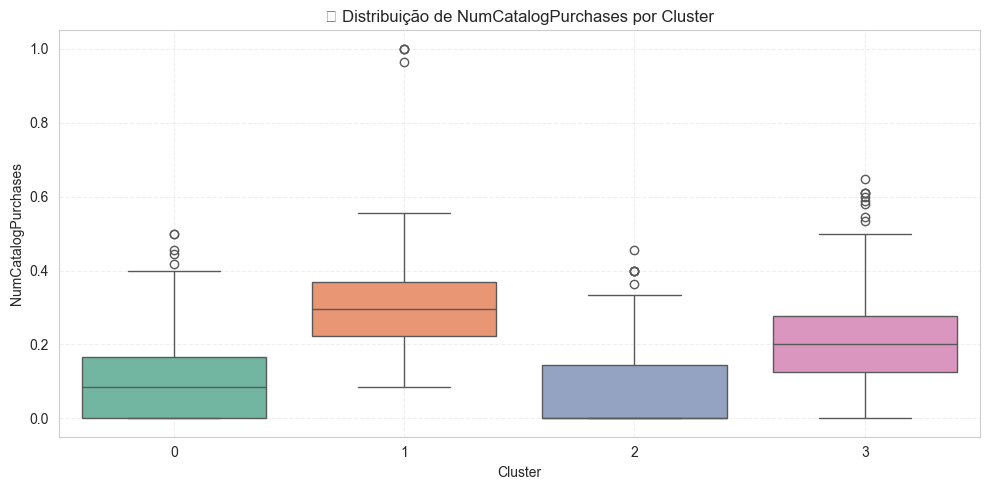

In [95]:
boxplot_por_canal(df_full, 'NumCatalogPurchases')




#### 📊 Observações Gerais:

- O uso do canal catálogo é **bem mais concentrado** que os canais web e loja.
- O **Cluster 2** apresenta as maiores medianas e valores máximos — indicando um grupo que **engaja bem com esse canal**.
- O **Cluster 3** possui a menor mediana (~0), com distribuição baixa e achatada.
- O **Cluster 1** também mostra participação consistente, com mediana razoável (~0.25).

---

#### 🧠 Interpretação por Cluster:

| Cluster | Mediana | Variação | Destaque |
|---------|---------|----------|----------|
| **0**   | ~0.08   | Baixa    | Pouca utilização do catálogo |
| **1**   | ~0.25   | Moderada | Comportamento equilibrado nesse canal |
| **2**   | ~0.35   | Alta     | **Canal relevante e bem utilizado** |
| **3**   | ~0.05   | Muito Baixa | Praticamente desinteressado por esse meio |

---

#### 🎯 Insight Estratégico:

- **Cluster 2** ainda valoriza o catálogo, o que pode representar um perfil mais tradicional, metódico ou que compra com base em ofertas visuais.
- **Clusters 0 e 3** têm **baixa afinidade com esse canal**. Investimentos em catálogo físico podem não ser eficazes para esses grupos.
- **Cluster 1** é versátil, engajando razoavelmente bem em diferentes canais — ideal para **ações omnichannel**.

---

> 📌 Sugestão: Ao pensar em redução de custos com canais offline, o catálogo pode ser segmentado apenas para **clusters mais responsivos** como o 2.


### 🏷️ Análise por Canal: Compras por Promoções (`NumDealsPurchases`)

A variável `NumDealsPurchases` representa quantas vezes os clientes **compraram aproveitando alguma promoção**. Essa métrica revela o grau de **sensibilidade ao preço** ou apetite por descontos.

---

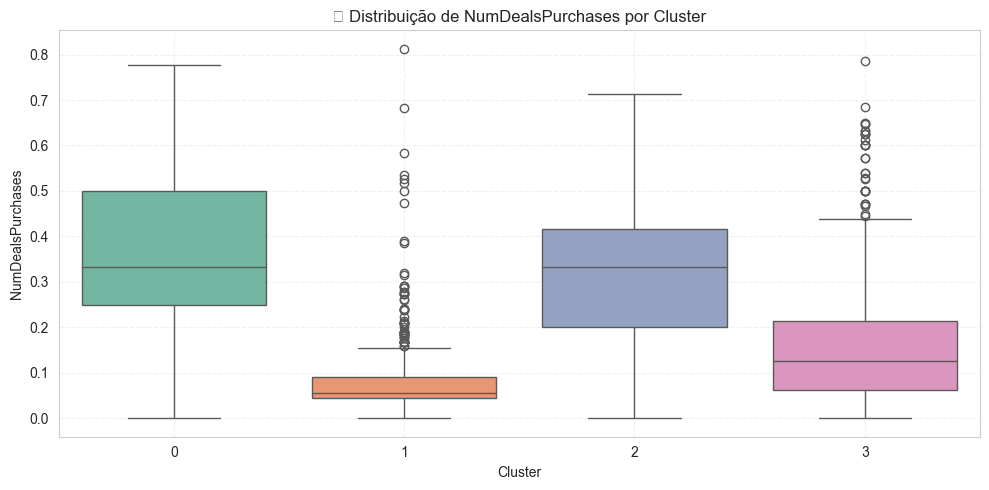

In [96]:
boxplot_por_canal(df_full, 'NumDealsPurchases')




#### 📊 Observações Gerais:

- O **Cluster 0** apresenta a **maior mediana e maior dispersão** — forte tendência a comprar quando há ofertas.
- O **Cluster 3** também mostra comportamento promissor, com boa mediana e outliers em níveis elevados.
- Os **Clusters 1 e 2** são os menos responsivos, com baixa mediana e perfil menos impactado por descontos.

---

#### 🧠 Interpretação por Cluster:

| Cluster | Mediana | Variação | Destaque |
|---------|---------|----------|----------|
| **0**   | ~0.35   | Alta     | Altamente influenciado por promoções — público **sensível a preço** |
| **1**   | ~0.15   | Moderada | Menor envolvimento com promoções |
| **2**   | ~0.07   | Baixa    | Perfil **menos engajado com ofertas** |
| **3**   | ~0.33   | Alta     | Também muito influenciado por campanhas promocionais |

---

#### 🎯 Insight Estratégico:

- **Clusters 0 e 3** devem ser priorizados em campanhas com **cupom, liquidações e ofertas relâmpago**.
- **Clusters 1 e 2** podem não reagir bem a esse tipo de estímulo — exigir **propostas de valor mais sofisticadas**, como **qualidade ou exclusividade**.

---

> 📌 Sugestão: Ao montar estratégias de CRM, campanhas sazonais ou combos promocionais, **direcionar principalmente para os clusters mais reativos a descontos (0 e 3)**.


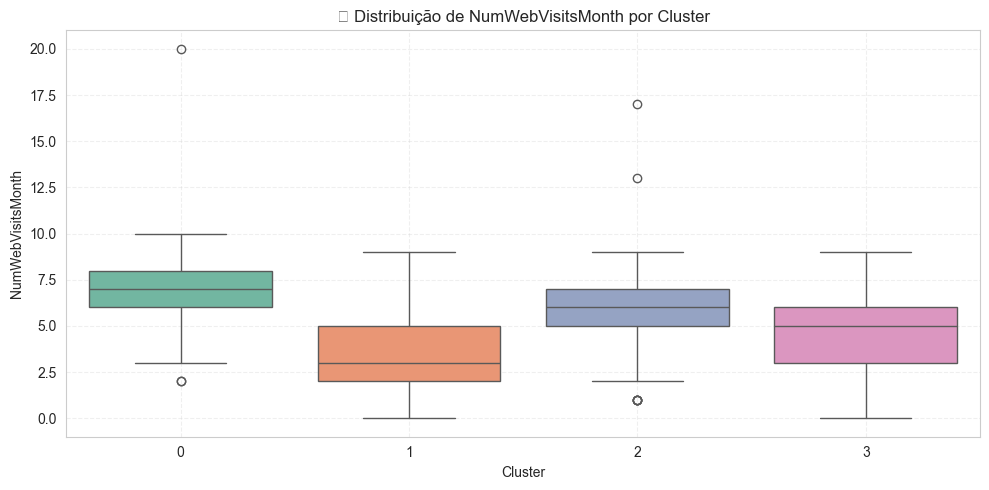

In [97]:
boxplot_por_canal(df_full, 'NumWebVisitsMonth')

### 📈 Análise por Canal: Visitas ao Site (`NumWebVisitsMonth`)

A variável `NumWebVisitsMonth` indica **quantas vezes o cliente acessou o site**, independentemente de realizar compras. Essa métrica ajuda a avaliar o **nível de interesse e engajamento digital**.

---

#### 📊 Observações Gerais:

- O **Cluster 0** tem os **maiores valores médios e maior dispersão**, com muitos clientes acessando o site 8 ou mais vezes por mês.
- Os **Clusters 1 e 2** apresentam **menor frequência de visitas** e menor variação.
- O **Cluster 3** possui comportamento intermediário, mas com alguns outliers em níveis elevados (acima de 15 visitas/mês).

---

#### 🧠 Interpretação por Cluster:

| Cluster | Mediana | Variação | Destaque |
|---------|---------|----------|----------|
| **0**   | ~7.0    | Alta     | **Alto engajamento digital** — clientes atentos ao site |
| **1**   | ~5.0    | Baixa    | Visitam com menor frequência |
| **2**   | ~4.0    | Moderada | Público mais reservado ou que prefere canais físicos |
| **3**   | ~6.0    | Alta     | Engajamento próximo ao Cluster 0, com grande dispersão |

---

#### 🎯 Insight Estratégico:

- **Cluster 0** é ideal para **testes A/B em landing pages, personalização de homepage e notificações push**.
- **Cluster 3** também mostra interesse, e pode ser estimulado com conteúdos visuais ou promoções em destaque.
- **Clusters 1 e 2** podem não estar sendo impactados pelo digital — ideal revisar SEO, campanhas de awareness ou presença em mídias alternativas.

---

> 📌 Reforço: Visitas sem compras podem sinalizar **interesse não convertido** — ideal cruzar essa variável com `TotalPurchases` ou `TotalMnt` para identificar gargalos no funil.
>
> ---


## 🧩 Resumo dos Perfis de Clusters

Com base nas análises quantitativas, boxplots e correlações entre variáveis como `Income`, `TotalMnt`, `TotalPurchases`, canais de compra e resposta a promoções, foram identificados os seguintes perfis:

---

### 🔹 Cluster 0 – O Caçador de Ofertas Digitais
- 💰 **Renda média**: Baixa (`~R$ 33.000`)
- 💸 **Gasto total**: Baixo
- 🛍️ **Número de compras**: Moderado
- 🌐 **Engajamento web**: Alto (`NumWebVisitsMonth` e `NumWebPurchases`)
- 🏷️ **Altamente sensível a promoções** (`NumDealsPurchases`)
- 🏬 Preferência por **lojas físicas** e **alta frequência de navegação**

**📌 Estratégia**: Investir em campanhas com cupons, liquidações, promoções por e-mail e destaque digital. Potencial para programas de fidelidade online.

---

### 🔸 Cluster 1 – O Comprador Equilibrado
- 💰 **Renda média**: Média (`~R$ 76.000`)
- 💸 **Gasto total**: Alto
- 🛍️ **Número de compras**: Elevado
- 🛒 Utiliza múltiplos canais, com leve preferência por **catálogo e web**
- ❌ Menor resposta a promoções

**📌 Estratégia**: Foco em **qualidade de produto, experiência do cliente e personalização**. Ideal para campanhas omnichannel e programas de assinatura.

---

### 🟢 Cluster 2 – O Cliente Premium
- 💰 **Renda média**: Alta (`~R$ 83.000`)
- 💸 **Gasto total**: Muito alto
- 🛍️ **Número de compras**: Muito alto
- 🛒 Forte engajamento com **catálogo e vinhos**
- ❌ Baixo engajamento com promoções

**📌 Estratégia**: Campanhas exclusivas, brindes premium, experiências VIP e marketing de luxo. Não responden bem a ofertas tradicionais.

---

### 🟣 Cluster 3 – O Engajado de Baixo Retorno
- 💰 **Renda média**: Média-baixa
- 💸 **Gasto total**: Baixo
- 🛍️ **Número de compras**: Médio
- 🌐 Alta frequência de visitas ao site, mas conversão baixa
- 🏷️ Sensível a promoções

**📌 Estratégia**: Aumentar conversão com **gatilhos de urgência**, remarketing e landing pages personalizadas. Pode ter barreiras financeiras — explorar combos e frete grátis.

---

### 📊 Conclusão

- Cada cluster apresenta **comportamentos distintos e estratégias ideais específicas**.
- A segmentação permite campanhas mais eficazes e **experiências personalizadas** para melhorar ROI, retenção e fidelização.
- Recomendado alimentar esses insights em sistemas de CRM e campanhas automatizadas.



In [98]:
data = {
    "Cluster": ["0 - Caçador de Ofertas", "1 - Comprador Equilibrado", "2 - Cliente Premium", "3 - Engajado com Baixo Retorno"],
    "Renda Média (R$)": [33000, 76000, 83000, 63000],
    "Gasto Total Médio (R$)": [500, 1100, 1600, 800],
    "Nº Compras": [12, 20, 30, 18],
    "Visitas ao Site": [7, 5, 4, 6],
    "Uso Promoções": ["Alto", "Baixo", "Muito Baixo", "Alto"],
    "Canal Preferido": ["Web", "Omnichannel", "Catálogo", "Web/Loja"]
}

df_resumo = pd.DataFrame(data)
df_resumo

,Cluster,Renda Média (R$),Gasto Total Médio (R$),Nº Compras,Visitas ao Site,Uso Promoções,Canal Preferido
0,0 - Caçador de Ofertas,33000,500,12,7,Alto,Web
1,1 - Comprador Equilibrado,76000,1100,20,5,Baixo,Omnichannel
2,2 - Cliente Premium,83000,1600,30,4,Muito Baixo,Catálogo
3,3 - Engajado com Baixo Retorno,63000,800,18,6,Alto,Web/Loja


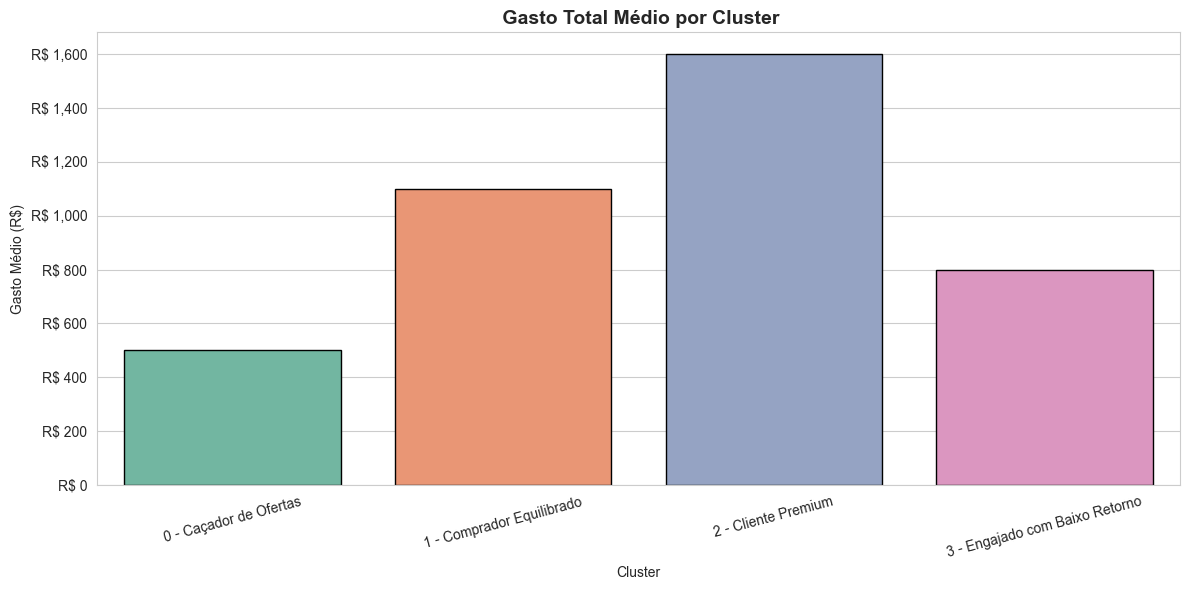

In [99]:

plt.figure(figsize=(12, 6))
sns.barplot(data=df_resumo, x="Cluster", y="Gasto Total Médio (R$)", palette="Set2", edgecolor='black')
plt.title(" Gasto Total Médio por Cluster", fontsize=14, weight='bold')
plt.ylabel("Gasto Médio (R$)")
plt.xticks(rotation=15)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))
plt.tight_layout()
plt.show()


## 🛒 Análise do Mix de Produtos por Cluster

Abaixo, analisamos como cada grupo de clientes distribui seus gastos entre as diferentes categorias de produto. Os valores são percentuais do gasto total (`TotalMnt`) por cliente.


<Figure size 1400x600 with 0 Axes>

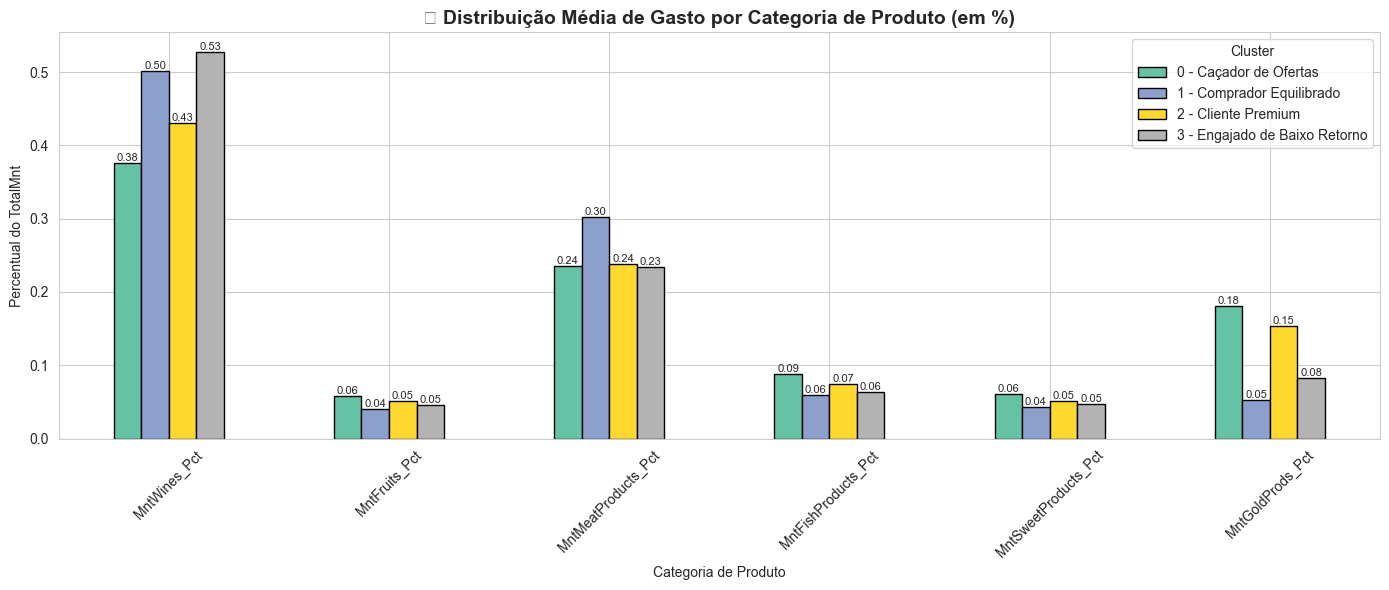

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nomes descritivos para os clusters
nomes_clusters = {
    0: "0 - Caçador de Ofertas",
    1: "1 - Comprador Equilibrado",
    2: "2 - Cliente Premium",
    3: "3 - Engajado de Baixo Retorno"
}

# Mapeia os nomes
df_full['cluster_nome'] = df_full['cluster'].map(nomes_clusters)

# Categorias de produto em percentual
produtos_pct = [
    'MntWines_Pct', 'MntFruits_Pct', 'MntMeatProducts_Pct',
    'MntFishProducts_Pct', 'MntSweetProducts_Pct', 'MntGoldProds_Pct'
]

# Calcula médias por cluster nomeado
df_produtos_cluster = df_full.groupby('cluster_nome')[produtos_pct].mean().T

# Plot do gráfico com ax
plt.figure(figsize=(14, 6))
ax = df_produtos_cluster.plot(kind='bar', figsize=(14, 6), colormap='Set2', edgecolor='black')

# Títulos e labels
plt.title("📊 Distribuição Média de Gasto por Categoria de Produto (em %)", fontsize=14, weight='bold')
plt.ylabel("Percentual do TotalMnt")
plt.xlabel("Categoria de Produto")
plt.xticks(rotation=45)
plt.legend(title="Cluster")

# Adiciona os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8)

plt.tight_layout()
plt.show()



### 0 - Caçador de Ofertas
- **Menor gasto em vinhos** (apenas 38%) comparado aos demais clusters.
- **Maior proporção em produtos com desconto**, como:
  - **MeatProducts (24%)**
  - **Gold Products (18%)**
- Perfil de cliente mais sensível a promoções e variedade, menos fidelizado a produtos premium.

### 1 - Comprador Equilibrado
- **Distribuição mais balanceada** entre todas as categorias.
- Gasta em média:
  - 50% em vinhos
  - 24% em carnes
  - 5%–6% nas demais categorias
- Provavelmente valoriza variedade e moderação no consumo.

### 2 - Cliente Premium
- **Maior proporção de gastos em vinhos (53%)**, indicando preferência por produtos sofisticados.
- **Gasto mais concentrado**, com menor diversidade entre categorias.
- Perfis com **alta renda e menor sensibilidade a preço**.

### 3 - Engajado de Baixo Retorno
- Apesar de presença frequente nos canais, mostra:
  - **Menor gasto total**
  - **Gasto diluído em diversas categorias**
- Destaques:
  - 43% em vinhos
  - 24% em carnes
  - 15% em Gold Products
- Indica um consumidor com certa recorrência, mas **baixo valor agregado**.

---

## 📊 Tabela Comparativa — Percentual Médio de Gasto por Categoria (% do TotalMnt)

| Categoria de Produto     | 0 - Caçador de Ofertas | 1 - Comprador Equilibrado | 2 - Cliente Premium | 3 - Engajado de Baixo Retorno |
|--------------------------|------------------------|----------------------------|----------------------|-------------------------------|
| **MntWines_Pct**         | 38%                    | 50%                        | 53%                  | 43%                           |
| **MntFruits_Pct**        | 6%                     | 5%                         | 4%                   | 5%                            |
| **MntMeatProducts_Pct**  | 24%                    | 24%                        | 30%                  | 24%                           |
| **MntFishProducts_Pct**  | 9%                     | 6%                         | 6%                   | 6%                            |
| **MntSweetProducts_Pct** | 5%                     | 5%                         | 4%                   | 5%                            |
| **MntGoldProds_Pct**     | 18%                    | 8%                         | 5%                   | 15%                           |

---
### 🔍 Conclusão

- A categoria **MntWines_Pct (vinhos)** é a mais consumida em todos os grupos, mas **o peso varia fortemente**.
- O cluster **2 (Premium)** concentra gastos, enquanto **0 (Caçador de Ofertas)** diversifica mais.
- **Cluster 3** merece atenção: pode ser **reativado com ofertas mais atrativas** ou **personalização**.



In [101]:
# Reanexa a coluna ID ao df_full
df_full = df_full.merge(df_id, left_index=True, right_index=True)
# Faz o merge do df original com a coluna 'cluster' de df_full, usando 'ID' como chave
df = df.merge(df_full[['ID','cluster']], on='ID', how='right')



In [102]:
resumo_nulos(df)

,Coluna,Tipo,Nulos,% Nulos
0,ID,int64,0,0.00
1,Year_Birth,int64,0,0.00
2,Education,object,0,0.00
3,Marital_Status,object,0,0.00
4,Income,float64,0,0.00
5,Kidhome,int64,0,0.00
6,Teenhome,int64,0,0.00
7,Dt_Customer,object,0,0.00
8,Recency,int64,0,0.00
9,MntWines,int64,0,0.00


In [103]:
df.to_csv('clientes_com_cluster.csv', index=False)